In [ ]:
# Install the pandas library for data manipulation and analysis
!pip install pandas

# Install the numpy library for numerical computations
!pip install numpy

# Install the matplotlib library for data visualization
!pip install matplotlib

# Install the statsmodels library for statistical modeling
!pip install statsmodels

# Install the pandas_datareader library to read data from various online sources into pandas dataframes
!pip install pandas_datareader

# Install the datetime library for working with dates and times
!pip install datetime

# Install the yfinance library for accessing Yahoo Finance data
!pip install yfinance

# Install the scikit-learn library for machine learning
!pip install scikit-learn

# Install the PyPortfolioOpt library for portfolio optimization
!pip install PyPortfolioOpt

# Install the pandas-ta library for technical analysis indicators with pandas
!pip install pandas-ta


In [ ]:
# Import the RollingOLS function from statsmodels for rolling (moving window) ordinary least squares regression
from statsmodels.regression.rolling import RollingOLS

# Import the data module from pandas_datareader to fetch data from online sources
import pandas_datareader.data as web

# Import the pyplot module from matplotlib for plotting and visualizations
import matplotlib.pyplot as plt

# Import the main statsmodels module for statistical modeling
import statsmodels.api as sm

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computations
import numpy as np

# Import datetime as dt for working with date and time objects
import datetime as dt

# Import yfinance as yf to fetch financial data from Yahoo Finance
import yfinance as yf

# Import pandas_ta for technical analysis indicators using pandas
import pandas_ta

# Import the warnings module and set it to ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Assuming your Excel file is named 'data.xlsx' and the column you want to read is 'Column_name'
df = pd.read_csv('ind_niftymidcap150list.csv')

# Access the specific column by its name and append .NS to each symbol
symbols_list = [symbol + '.NS' for symbol in df['Symbol'].unique().tolist()]

# Remove 'UNITDSPR.NS' from the list as data not available on yfinance
symbols_list = [symbol for symbol in symbols_list if not symbol == 'JSWINFRA.NS' and not symbol == 'TATATECH.NS']

# Display the resulting list of symbols
symbols_list


['3MINDIA.NS',
 'ACC.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'ABBOTINDIA.NS',
 'AWL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AJANTPHARM.NS',
 'ALKEM.NS',
 'APOLLOTYRE.NS',
 'ASHOKLEY.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'BSE.NS',
 'BALKRISIND.NS',
 'BANDHANBNK.NS',
 'BANKINDIA.NS',
 'MAHABANK.NS',
 'BATAINDIA.NS',
 'BAYERCROP.NS',
 'BDL.NS',
 'BHARATFORG.NS',
 'BHEL.NS',
 'BIOCON.NS',
 'CGPOWER.NS',
 'CRISIL.NS',
 'CARBORUNIV.NS',
 'COFORGE.NS',
 'CONCOR.NS',
 'COROMANDEL.NS',
 'CUMMINSIND.NS',
 'DALBHARAT.NS',
 'DEEPAKNTR.NS',
 'DELHIVERY.NS',
 'DEVYANI.NS',
 'DIXON.NS',
 'LALPATHLAB.NS',
 'EMAMILTD.NS',
 'ENDURANCE.NS',
 'ESCORTS.NS',
 'NYKAA.NS',
 'FEDERALBNK.NS',
 'FACT.NS',
 'FORTIS.NS',
 'GMRINFRA.NS',
 'GICRE.NS',
 'GLAND.NS',
 'GLAXO.NS',
 'GODREJIND.NS',
 'GODREJPROP.NS',
 'GRINDWELL.NS',
 'FLUOROCHEM.NS',
 'GUJGASLTD.NS',
 'HDFCAMC.NS',
 'HINDPETRO.NS',
 'HINDZINC.NS',
 'HONAUT.NS',
 'ISEC.NS',
 'IDBI.NS',
 'IDFCFIRSTB.NS',
 'INDIANB.NS',
 'INDHOTEL.NS',
 

In [ ]:
# Set the end date for the data retrieval
end_date = '2024-01-01'

# Calculate the start date by subtracting 8 years (365 days * 8) from the end date
start_date = pd.to_datetime(end_date) - pd.DateOffset(365 * 8)

#df = yf.download(tickers = "TTML.NS", start=start_date, end=end_date)

# Download the stock data for the list of symbols from Yahoo Finance within the date range
df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

# Rename the index levels for better clarity
df.index.names = ['date', 'ticker']

# Convert the column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Display the resulting DataFrame
df.dropna(inplace=True)
df

[*********************100%%**********************]  148 of 148 completed


Price                        adj close         close          high  \
date       ticker                                                    
2016-01-04 3MINDIA.NS     10478.965820  10935.799805  11330.000000   
           ABBOTINDIA.NS   5599.889160   5930.899902   5999.950195   
           ABFRL.NS         244.258255    244.258255    255.101028   
           ACC.NS          1195.309082   1344.000000   1378.199951   
           AIAENG.NS        837.464233    885.799988    907.000000   
...                                ...           ...           ...   
2023-12-29 UPL.NS           587.250000    587.250000    592.000000   
           VOLTAS.NS        978.349976    978.349976    985.000000   
           YESBANK.NS        21.450001     21.450001     21.799999   
           ZEEL.NS          274.700012    274.700012    278.250000   
           ZFCVINDIA.NS   16006.900391  16006.900391  16071.049805   

Price                              low          open       volume  
date       ticker                                                  
2016-01-04 3MINDIA.NS     10578.500000  11330.000000       1002.0  
           ABBOTINDIA.NS   5850.000000   5850.000000       2110.0  
           ABFRL.NS         241.498276    245.884674     201331.0  
           ACC.NS          1332.000000   1368.400024     158288.0  
           AIAENG.NS        877.700012    907.000000      40185.0  
...                                ...           ...          ...  
2023-12-29 UPL.NS           585.049988    592.000000    2223633.0  
           VOLTAS.NS        969.750000    972.250000    1746196.0  
           YESBANK.NS        20.700001     20.900000  226340962.0  
           ZEEL.NS          269.750000    274.000000   20300780.0  
           ZFCVINDIA.NS   15290.349609  15404.000000      27635.0  

[255388 rows x 6 columns]

In [ ]:
# Calculate the Garman-Klass volatility for each row and store it in a new column 'garman_klass_vol'
# This is a measure of stock price volatility that uses high, low, open, and close prices
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2 * np.log(2) - 1) * ((np.log(df['adj close']) - np.log(df['open']))**2)

# Calculate the Relative Strength Index (RSI) for each stock and store it in a new column 'rsi'
# RSI is a momentum oscillator that measures the speed and change of price movements
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

# Calculate the lower Bollinger Band for each stock and store it in a new column 'bb_low'
# Bollinger Bands are volatility bands placed above and below a moving average
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])

# Calculate the middle Bollinger Band (moving average) for each stock and store it in a new column 'bb_mid'
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])

# Calculate the upper Bollinger Band for each stock and store it in a new column 'bb_high'
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])

# Define a function to compute the Average True Range (ATR) for a given stock's data
# ATR is a measure of volatility introduced by market technician J. Welles Wilder Jr.
def compute_atr(stock_data):
    # Calculate the ATR using high, low, and close prices over a 14-day period
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    # Normalize the ATR by subtracting its mean and dividing by its standard deviation
    return atr.sub(atr.mean()).div(atr.std())

# Apply the compute_atr function to each stock in the DataFrame and store the result in a new column 'atr'
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

# Display the resulting DataFrame
df


Price                        adj close         close          high  \
date       ticker                                                    
2016-01-04 3MINDIA.NS     10478.965820  10935.799805  11330.000000   
           ABBOTINDIA.NS   5599.889160   5930.899902   5999.950195   
           ABFRL.NS         244.258255    244.258255    255.101028   
           ACC.NS          1195.309082   1344.000000   1378.199951   
           AIAENG.NS        837.464233    885.799988    907.000000   
...                                ...           ...           ...   
2023-12-29 UPL.NS           587.250000    587.250000    592.000000   
           VOLTAS.NS        978.349976    978.349976    985.000000   
           YESBANK.NS        21.450001     21.450001     21.799999   
           ZEEL.NS          274.700012    274.700012    278.250000   
           ZFCVINDIA.NS   16006.900391  16006.900391  16071.049805   

Price                              low          open       volume  \
date       ticker                                                   
2016-01-04 3MINDIA.NS     10578.500000  11330.000000       1002.0   
           ABBOTINDIA.NS   5850.000000   5850.000000       2110.0   
           ABFRL.NS         241.498276    245.884674     201331.0   
           ACC.NS          1332.000000   1368.400024     158288.0   
           AIAENG.NS        877.700012    907.000000      40185.0   
...                                ...           ...          ...   
2023-12-29 UPL.NS           585.049988    592.000000    2223633.0   
           VOLTAS.NS        969.750000    972.250000    1746196.0   
           YESBANK.NS        20.700001     20.900000  226340962.0   
           ZEEL.NS          269.750000    274.000000   20300780.0   
           ZFCVINDIA.NS   15290.349609  15404.000000      27635.0   

Price                     garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2016-01-04 3MINDIA.NS        -2.162388e-07        NaN       NaN       NaN   
           ABBOTINDIA.NS     -4.172433e-04        NaN       NaN       NaN   
           ABFRL.NS           1.484360e-03        NaN       NaN       NaN   
           ACC.NS            -6.483704e-03        NaN       NaN       NaN   
           AIAENG.NS         -1.918559e-03        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2023-12-29 UPL.NS             4.466004e-05  51.537409  6.344923  6.380615   
           VOLTAS.NS          1.066208e-04  75.276792  6.674655  6.792094   
           YESBANK.NS         1.079743e-03  59.711170  2.997674  3.081265   
           ZEEL.NS            4.787414e-04  54.515240  5.523659  5.602840   
           ZFCVINDIA.NS       6.705042e-04  53.616048  9.628103  9.665035   

Price                      bb_high       atr  
date       ticker                             
2016-01-04 3MINDIA.NS          NaN       NaN  
           ABBOTINDIA.NS       NaN       NaN  
           ABFRL.NS            NaN       NaN  
           ACC.NS              NaN       NaN  
           AIAENG.NS           NaN       NaN  
...                            ...       ...  
2023-12-29 UPL.NS         6.416308 -0.995223  
           VOLTAS.NS      6.909532  0.181854  
           YESBANK.NS     3.164855 -0.855496  
           ZEEL.NS        5.682020 -0.079639  
           ZFCVINDIA.NS   9.701967  2.781133  

[255388 rows x 12 columns]

In [ ]:
# Define a function to compute the normalized MACD (Moving Average Convergence Divergence) for a given series of closing prices
def compute_macd(close):
    # Calculate the MACD using a default fast period of 12, slow period of 26, and signal period of 9
    macd = pandas_ta.macd(close=close, length=20).iloc[:, 0]
    # Normalize the MACD by subtracting its mean and dividing by its standard deviation
    return macd.sub(macd.mean()).div(macd.std())

# Apply the compute_macd function to each stock's adjusted closing prices in the DataFrame
# Store the result in a new column 'macd'
df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

# Display the resulting DataFrame
df


Price                        adj close         close          high  \
date       ticker                                                    
2016-01-04 3MINDIA.NS     10478.965820  10935.799805  11330.000000   
           ABBOTINDIA.NS   5599.889160   5930.899902   5999.950195   
           ABFRL.NS         244.258255    244.258255    255.101028   
           ACC.NS          1195.309082   1344.000000   1378.199951   
           AIAENG.NS        837.464233    885.799988    907.000000   
...                                ...           ...           ...   
2023-12-29 UPL.NS           587.250000    587.250000    592.000000   
           VOLTAS.NS        978.349976    978.349976    985.000000   
           YESBANK.NS        21.450001     21.450001     21.799999   
           ZEEL.NS          274.700012    274.700012    278.250000   
           ZFCVINDIA.NS   16006.900391  16006.900391  16071.049805   

Price                              low          open       volume  \
date       ticker                                                   
2016-01-04 3MINDIA.NS     10578.500000  11330.000000       1002.0   
           ABBOTINDIA.NS   5850.000000   5850.000000       2110.0   
           ABFRL.NS         241.498276    245.884674     201331.0   
           ACC.NS          1332.000000   1368.400024     158288.0   
           AIAENG.NS        877.700012    907.000000      40185.0   
...                                ...           ...          ...   
2023-12-29 UPL.NS           585.049988    592.000000    2223633.0   
           VOLTAS.NS        969.750000    972.250000    1746196.0   
           YESBANK.NS        20.700001     20.900000  226340962.0   
           ZEEL.NS          269.750000    274.000000   20300780.0   
           ZFCVINDIA.NS   15290.349609  15404.000000      27635.0   

Price                     garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2016-01-04 3MINDIA.NS        -2.162388e-07        NaN       NaN       NaN   
           ABBOTINDIA.NS     -4.172433e-04        NaN       NaN       NaN   
           ABFRL.NS           1.484360e-03        NaN       NaN       NaN   
           ACC.NS            -6.483704e-03        NaN       NaN       NaN   
           AIAENG.NS         -1.918559e-03        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2023-12-29 UPL.NS             4.466004e-05  51.537409  6.344923  6.380615   
           VOLTAS.NS          1.066208e-04  75.276792  6.674655  6.792094   
           YESBANK.NS         1.079743e-03  59.711170  2.997674  3.081265   
           ZEEL.NS            4.787414e-04  54.515240  5.523659  5.602840   
           ZFCVINDIA.NS       6.705042e-04  53.616048  9.628103  9.665035   

Price                      bb_high       atr      macd  
date       ticker                                       
2016-01-04 3MINDIA.NS          NaN       NaN       NaN  
           ABBOTINDIA.NS       NaN       NaN       NaN  
           ABFRL.NS            NaN       NaN       NaN  
           ACC.NS              NaN       NaN       NaN  
           AIAENG.NS           NaN       NaN       NaN  
...                            ...       ...       ...  
2023-12-29 UPL.NS         6.416308 -0.995223  0.125581  
           VOLTAS.NS      6.909532  0.181854  2.207479  
           YESBANK.NS     3.164855 -0.855496  0.146462  
           ZEEL.NS        5.682020 -0.079639  0.339991  
           ZFCVINDIA.NS   9.701967  2.781133 -0.921344  

[255388 rows x 13 columns]

In [ ]:
# Calculate the dollar volume for each row and store it in a new column 'dollar_volume'
# Dollar volume is calculated as the product of the adjusted closing price and the volume, divided by 1,000,000 to convert to millions
df['dollar_volume'] = (df['adj close'] * df['volume']) / 1e6

# Display the resulting DataFrame
df


Price                        adj close         close          high  \
date       ticker                                                    
2016-01-04 3MINDIA.NS     10478.965820  10935.799805  11330.000000   
           ABBOTINDIA.NS   5599.889160   5930.899902   5999.950195   
           ABFRL.NS         244.258255    244.258255    255.101028   
           ACC.NS          1195.309082   1344.000000   1378.199951   
           AIAENG.NS        837.464233    885.799988    907.000000   
...                                ...           ...           ...   
2023-12-29 UPL.NS           587.250000    587.250000    592.000000   
           VOLTAS.NS        978.349976    978.349976    985.000000   
           YESBANK.NS        21.450001     21.450001     21.799999   
           ZEEL.NS          274.700012    274.700012    278.250000   
           ZFCVINDIA.NS   16006.900391  16006.900391  16071.049805   

Price                              low          open       volume  \
date       ticker                                                   
2016-01-04 3MINDIA.NS     10578.500000  11330.000000       1002.0   
           ABBOTINDIA.NS   5850.000000   5850.000000       2110.0   
           ABFRL.NS         241.498276    245.884674     201331.0   
           ACC.NS          1332.000000   1368.400024     158288.0   
           AIAENG.NS        877.700012    907.000000      40185.0   
...                                ...           ...          ...   
2023-12-29 UPL.NS           585.049988    592.000000    2223633.0   
           VOLTAS.NS        969.750000    972.250000    1746196.0   
           YESBANK.NS        20.700001     20.900000  226340962.0   
           ZEEL.NS          269.750000    274.000000   20300780.0   
           ZFCVINDIA.NS   15290.349609  15404.000000      27635.0   

Price                     garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2016-01-04 3MINDIA.NS        -2.162388e-07        NaN       NaN       NaN   
           ABBOTINDIA.NS     -4.172433e-04        NaN       NaN       NaN   
           ABFRL.NS           1.484360e-03        NaN       NaN       NaN   
           ACC.NS            -6.483704e-03        NaN       NaN       NaN   
           AIAENG.NS         -1.918559e-03        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2023-12-29 UPL.NS             4.466004e-05  51.537409  6.344923  6.380615   
           VOLTAS.NS          1.066208e-04  75.276792  6.674655  6.792094   
           YESBANK.NS         1.079743e-03  59.711170  2.997674  3.081265   
           ZEEL.NS            4.787414e-04  54.515240  5.523659  5.602840   
           ZFCVINDIA.NS       6.705042e-04  53.616048  9.628103  9.665035   

Price                      bb_high       atr      macd  dollar_volume  
date       ticker                                                      
2016-01-04 3MINDIA.NS          NaN       NaN       NaN      10.499924  
           ABBOTINDIA.NS       NaN       NaN       NaN      11.815766  
           ABFRL.NS            NaN       NaN       NaN      49.176759  
           ACC.NS              NaN       NaN       NaN     189.203084  
           AIAENG.NS           NaN       NaN       NaN      33.653500  
...                            ...       ...       ...            ...  
2023-12-29 UPL.NS         6.416308 -0.995223  0.125581    1305.828479  
           VOLTAS.NS      6.909532  0.181854  2.207479    1708.390814  
           YESBANK.NS     3.164855 -0.855496  0.146462    4855.013808  
           ZEEL.NS        5.682020 -0.079639  0.339991    5576.624514  
           ZFCVINDIA.NS   9.701967  2.781133 -0.921344     442.350692  

[255388 rows x 14 columns]

 Aggregate to monthly level and filter top 150 most liquid stocks for each month.
To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.

In [ ]:
# Define a list of columns to keep for further analysis, excluding specified columns
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]

# Resample the 'dollar_volume' column to monthly frequency, taking the mean for each month
# Then, unstack the 'ticker' level of the index and convert it to a DataFrame
dollar_volume_monthly = df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

# Resample the specified columns to monthly frequency, taking the last value for each month
# Then, unstack the index and stack the 'ticker' level back
last_cols_monthly = df.unstack()[last_cols].resample('M').last().stack('ticker')

# Concatenate the two DataFrames along the columns, aligning on the index
# Drop rows with any missing values
data = pd.concat([dollar_volume_monthly, last_cols_monthly], axis=1).dropna()

# Display the resulting DataFrame
data


dollar_volume     adj close       atr   bb_high  \
date       ticker                                                           
2016-02-29 3MINDIA.NS         19.943645   9948.445312 -0.770652  9.327638   
           ABBOTINDIA.NS      19.771187   4519.075684 -0.740687  8.471020   
           ABFRL.NS          420.337108    126.318382  1.645755  5.331347   
           ACC.NS            207.355794   1066.823730 -0.876295  7.056870   
           AIAENG.NS          53.456002    763.011292 -1.078111  6.682919   
...                                 ...           ...       ...       ...   
2023-12-31 UPL.NS           1629.087123    587.250000 -0.995223  6.416308   
           VOLTAS.NS        2168.583803    978.349976  0.181854  6.909532   
           YESBANK.NS       5884.552835     21.450001 -0.855496  3.164855   
           ZEEL.NS          7413.902043    274.700012 -0.079639  5.682020   
           ZFCVINDIA.NS      144.058843  16006.900391  2.781133  9.701967   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2016-02-29 3MINDIA.NS     9.134137  9.230887         -0.000453 -0.106826   
           ABBOTINDIA.NS  8.388035  8.429528         -0.001171 -0.879555   
           ABFRL.NS       4.770544  5.050945          0.001427 -3.505604   
           ACC.NS         6.968654  7.012762         -0.004159 -0.436597   
           AIAENG.NS      6.523636  6.603277          0.002882 -0.591858   
...                            ...       ...               ...       ...   
2023-12-31 UPL.NS         6.344923  6.380615          0.000045  0.125581   
           VOLTAS.NS      6.674655  6.792094          0.000107  2.207479   
           YESBANK.NS     2.997674  3.081265          0.001080  0.146462   
           ZEEL.NS        5.523659  5.602840          0.000479  0.339991   
           ZFCVINDIA.NS   9.628103  9.665035          0.000671 -0.921344   

                                rsi  
date       ticker                    
2016-02-29 3MINDIA.NS     46.617755  
           ABBOTINDIA.NS  34.583219  
           ABFRL.NS       23.368149  
           ACC.NS         39.206678  
           AIAENG.NS      51.367538  
...                             ...  
2023-12-31 UPL.NS         51.537409  
           VOLTAS.NS      75.276792  
           YESBANK.NS     59.711170  
           ZEEL.NS        54.515240  
           ZFCVINDIA.NS   53.616048  

[12282 rows x 9 columns]

Calculate 5-year rolling average of dollar volume for each stocks before filtering.

In [ ]:
# Calculate the rolling mean of the 'dollar_volume' over a 5-year window (5*12 months) with a minimum of 12 periods
# Unstack the 'ticker' level of the index, apply rolling mean, then stack the 'ticker' level back
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5 * 12, min_periods=12).mean().stack())

# Rank the 'dollar_volume' for each date in descending order
data['dollar_vol_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)

# Filter the data to keep only the top 150 ranked dollar volumes per date
# Drop the 'dollar_volume' and 'dollar_vol_rank' columns as they are no longer needed
data = data[data['dollar_vol_rank'] < 150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

# Display the resulting DataFrame
data


adj close       atr   bb_high    bb_low  \
date       ticker                                                      
2017-01-31 3MINDIA.NS     11457.986328 -1.298284  9.449257  9.253458   
           ABBOTINDIA.NS   4186.649414 -1.263395  8.397393  8.321588   
           ABFRL.NS         147.905365 -1.387011  5.010289  4.905537   
           ACC.NS          1271.330200 -1.083526  7.155114  7.053980   
           AIAENG.NS       1294.815918 -0.766373  7.217333  7.097241   
...                                ...       ...       ...       ...   
2023-12-31 UPL.NS           587.250000 -0.995223  6.416308  6.344923   
           VOLTAS.NS        978.349976  0.181854  6.909532  6.674655   
           YESBANK.NS        21.450001 -0.855496  3.164855  2.997674   
           ZEEL.NS          274.700012 -0.079639  5.682020  5.523659   
           ZFCVINDIA.NS   16006.900391  2.781133  9.701967  9.628103   

                            bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                          
2017-01-31 3MINDIA.NS     9.351357         -0.000982  0.476609  52.691891  
           ABBOTINDIA.NS  8.359491         -0.001155 -0.574913  37.357273  
           ABFRL.NS       4.957913          0.000355  0.485868  61.129721  
           ACC.NS         7.104547         -0.004239  0.435699  59.093108  
           AIAENG.NS      7.157287         -0.000540  0.374990  54.291786  
...                            ...               ...       ...        ...  
2023-12-31 UPL.NS         6.380615          0.000045  0.125581  51.537409  
           VOLTAS.NS      6.792094          0.000107  2.207479  75.276792  
           YESBANK.NS     3.081265          0.001080  0.146462  59.711170  
           ZEEL.NS        5.602840          0.000479  0.339991  54.515240  
           ZFCVINDIA.NS   9.665035          0.000671 -0.921344  53.616048  

[10664 rows x 8 columns]

 Calculate Monthly Returns for different time horizons as features.
To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [ ]:
def calculate_returns(df):
    # Define the cutoff for outlier clipping
    outlier_cutoff = 0.005

    # Define a list of lag periods for calculating returns
    lags = [1, 2, 3, 6, 9, 12]

    # Loop through each lag period and calculate the corresponding returns
    for lag in lags:
        # Calculate the percentage change over the lag period
        returns = df['adj close'].pct_change(lag)

        # Clip the returns between specified quantiles to handle outliers
        clipped_returns = returns.clip(lower=returns.quantile(outlier_cutoff),
                                       upper=returns.quantile(1 - outlier_cutoff))

        # Apply the formula to adjust for the clipping and calculate the compounded returns
        adjusted_returns = clipped_returns.add(1).pow(1 / lag).sub(1)

        # Assign the calculated returns to a new column in the DataFrame
        df[f'return_{lag}m'] = adjusted_returns

    return df

# Apply the calculate_returns function to each group in the DataFrame based on the 'ticker' level
# Drop rows with any missing values
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

# Display the resulting DataFrame
data


adj close       atr   bb_high    bb_low  \
date       ticker                                                      
2018-01-31 3MINDIA.NS     18010.957031 -0.316796  9.845710  9.732537   
           ABBOTINDIA.NS   5400.588867 -1.001200  8.594240  8.530140   
           ABFRL.NS         160.719559 -0.871220  5.188866  5.061458   
           ACC.NS          1559.218384 -0.877580  7.444693  7.350706   
           AIAENG.NS       1476.431274 -0.549180  7.358788  7.297673   
...                                ...       ...       ...       ...   
2023-12-31 UPL.NS           587.250000 -0.995223  6.416308  6.344923   
           VOLTAS.NS        978.349976  0.181854  6.909532  6.674655   
           YESBANK.NS        21.450001 -0.855496  3.164855  2.997674   
           ZEEL.NS          274.700012 -0.079639  5.682020  5.523659   
           ZFCVINDIA.NS   16006.900391  2.781133  9.701967  9.628103   

                            bb_mid  garman_klass_vol      macd        rsi  \
date       ticker                                                           
2018-01-31 3MINDIA.NS     9.789124         -0.000781  0.689566  61.261477   
           ABBOTINDIA.NS  8.562190          0.000462 -0.047131  63.200461   
           ABFRL.NS       5.125162          0.000466 -0.331987  44.738298   
           ACC.NS         7.397699         -0.003843 -0.257853  41.426047   
           AIAENG.NS      7.328231         -0.000917 -0.223871  46.534921   
...                            ...               ...       ...        ...   
2023-12-31 UPL.NS         6.380615          0.000045  0.125581  51.537409   
           VOLTAS.NS      6.792094          0.000107  2.207479  75.276792   
           YESBANK.NS     3.081265          0.001080  0.146462  59.711170   
           ZEEL.NS        5.602840          0.000479  0.339991  54.515240   
           ZFCVINDIA.NS   9.665035          0.000671 -0.921344  53.616048   

                          return_1m  return_2m  return_3m  return_6m  \
date       ticker                                                      
2018-01-31 3MINDIA.NS     -0.017269   0.103303   0.098228   0.058307   
           ABBOTINDIA.NS   0.018118   0.032721   0.099565   0.040028   
           ABFRL.NS       -0.054509  -0.013520   0.012899  -0.009346   
           ACC.NS         -0.024540   0.014095  -0.017673  -0.001734   
           AIAENG.NS      -0.009353   0.020921   0.037163   0.010076   
...                             ...        ...        ...        ...   
2023-12-31 UPL.NS          0.029090   0.042350  -0.015939  -0.023291   
           VOLTAS.NS       0.181653   0.080823   0.042583   0.043047   
           YESBANK.NS      0.108527   0.159667   0.075341   0.047359   
           ZEEL.NS         0.085342   0.029466   0.012629   0.075651   
           ZFCVINDIA.NS    0.006654   0.009577   0.009685   0.047215   

                          return_9m  return_12m  
date       ticker                                
2018-01-31 3MINDIA.NS      0.056110    0.038410  
           ABBOTINDIA.NS   0.028115    0.021444  
           ABFRL.NS       -0.006368    0.006948  
           ACC.NS          0.006632    0.017156  
           AIAENG.NS       0.002425    0.010998  
...                             ...         ...  
2023-12-31 UPL.NS         -0.020264   -0.015065  
           VOLTAS.NS       0.020654    0.017377  
           YESBANK.NS      0.040157    0.003375  
           ZEEL.NS         0.029072    0.011299  
           ZFCVINDIA.NS    0.049229    0.047021  

[8921 rows x 14 columns]

Download Fama-French Factors and Calculate Rolling Factor Betas.
We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [ ]:
# Import the DataReader function from pandas_datareader to fetch data from Fama-French databases
from pandas_datareader import DataReader as web

# Fetch the Fama-French 5 Factors 2x3 dataset from the Fama-French library starting from 2010
factor_data = web('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2010')[0]

# Drop the 'RF' (Risk-Free Rate) column from the dataset
factor_data = factor_data.drop('RF', axis=1)

# Convert the index of factor_data to timestamp format for consistency
factor_data.index = factor_data.index.to_timestamp()

# Resample the data to monthly frequency, taking the last observation for each month
factor_data = factor_data.resample('M').last()

# Divide the factor_data values by 100 to convert percentages to decimal format
factor_data = factor_data.div(100)

# Set the index name of factor_data to 'date' for better clarity
factor_data.index.name = 'date'

# Join the factor_data with the 'return_1m' column from the previously processed data DataFrame
factor_data = factor_data.join(data['return_1m'])

# Sort the index of factor_data for consistency
factor_data = factor_data.sort_index()

# Display the resulting factor_data DataFrame
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2018-01-31 3MINDIA.NS     0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.017269
           ABBOTINDIA.NS  0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.018118
           ABFRL.NS       0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.054509
           ACC.NS         0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.024540
           AIAENG.NS      0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.009353
...                          ...     ...     ...     ...     ...        ...
2023-12-31 UPL.NS         0.0487  0.0733  0.0495 -0.0307  0.0131   0.029090
           VOLTAS.NS      0.0487  0.0733  0.0495 -0.0307  0.0131   0.181653
           YESBANK.NS     0.0487  0.0733  0.0495 -0.0307  0.0131   0.108527
           ZEEL.NS        0.0487  0.0733  0.0495 -0.0307  0.0131   0.085342
           ZFCVINDIA.NS   0.0487  0.0733  0.0495 -0.0307  0.0131   0.006654

[8921 rows x 6 columns]

Filter out stocks with less than 10 months of data.

In [ ]:
# Count the number of observations for each ticker (level 1) in the factor_data DataFrame
observations = factor_data.groupby(level=1).size()

# Filter out tickers with fewer than 10 observations and keep only valid stocks
valid_stocks = observations[observations >= 10]

# Filter factor_data to keep only the tickers present in valid_stocks
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

# Display the resulting factor_data DataFrame with valid stocks
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2018-01-31 3MINDIA.NS     0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.017269
           ABBOTINDIA.NS  0.0557 -0.0318 -0.0129 -0.0076 -0.0096   0.018118
           ABFRL.NS       0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.054509
           ACC.NS         0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.024540
           AIAENG.NS      0.0557 -0.0318 -0.0129 -0.0076 -0.0096  -0.009353
...                          ...     ...     ...     ...     ...        ...
2023-12-31 UPL.NS         0.0487  0.0733  0.0495 -0.0307  0.0131   0.029090
           VOLTAS.NS      0.0487  0.0733  0.0495 -0.0307  0.0131   0.181653
           YESBANK.NS     0.0487  0.0733  0.0495 -0.0307  0.0131   0.108527
           ZEEL.NS        0.0487  0.0733  0.0495 -0.0307  0.0131   0.085342
           ZFCVINDIA.NS   0.0487  0.0733  0.0495 -0.0307  0.0131   0.006654

[8883 rows x 6 columns]

Calculate Rolling Factor Betas.

In [ ]:
# Define a lambda function to calculate rolling betas using RollingOLS from statsmodels
betas = (factor_data.groupby(level=1, group_keys=False)  # Group by ticker (level 1) without adding group keys
         .apply(lambda x:
                RollingOLS(endog=x['return_1m'],  # Endogenous variable is 'return_1m'
                           exog=sm.add_constant(x.drop('return_1m', axis=1)),  # Exogenous variables with constant term added
                           window=min(24, x.shape[0]),  # Rolling window size, minimum of 24 or length of data
                           min_nobs=len(x.columns) + 1)  # Minimum number of observations required
                .fit(params_only=True)  # Fit the RollingOLS model and extract only the parameters
                .params  # Extract the parameters (coefficients)
                .drop('const', axis=1)))  # Drop the constant term from the parameters

# Display the resulting betas DataFrame containing rolling betas for each ticker
betas


Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2018-01-31 3MINDIA.NS          NaN       NaN       NaN       NaN       NaN
           ABBOTINDIA.NS       NaN       NaN       NaN       NaN       NaN
           ABFRL.NS            NaN       NaN       NaN       NaN       NaN
           ACC.NS              NaN       NaN       NaN       NaN       NaN
           AIAENG.NS           NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-12-31 UPL.NS         1.134319 -0.683767 -0.134916 -0.146906  0.808437
           VOLTAS.NS     -0.092642  1.003850 -0.024015 -0.137702 -0.257566
           YESBANK.NS     0.133113  0.603253  0.363944 -0.111590 -0.013066
           ZEEL.NS        1.024127 -1.147522  0.358309 -1.038219 -0.408047
           ZFCVINDIA.NS  -0.019597  0.266550  0.487572  0.192393 -1.322102

[8883 rows x 5 columns]

Join the rolling factors data to the main features dataframe.

In [ ]:
# Define the list of factor names
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

# Join the 'betas' DataFrame with the 'data' DataFrame, shifting the betas by one period
data = data.join(betas.groupby('ticker').shift())

# Fill missing values in the specified factors by group (ticker) with the group mean
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

# Drop the 'adj close' column from the DataFrame
data = data.drop('adj close', axis=1)

# Drop rows with any missing values
data = data.dropna()

# Display information about the resulting DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8814 entries, (Timestamp('2018-01-31 00:00:00'), '3MINDIA.NS') to (Timestamp('2023-12-31 00:00:00'), 'ZFCVINDIA.NS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               8814 non-null   float64
 1   bb_high           8814 non-null   float64
 2   bb_low            8814 non-null   float64
 3   bb_mid            8814 non-null   float64
 4   garman_klass_vol  8814 non-null   float64
 5   macd              8814 non-null   float64
 6   rsi               8814 non-null   float64
 7   return_1m         8814 non-null   float64
 8   return_2m         8814 non-null   float64
 9   return_3m         8814 non-null   float64
 10  return_6m         8814 non-null   float64
 11  return_9m         8814 non-null   float64
 12  return_12m        8814 non-null   float64
 13  Mkt-RF            8814 non-null   float64
 14  SMB               8814 non-null   float64
 

At this point we have to decide on what ML model and approach to use for predictions etc.

For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
K-Means Clustering
You may want to initialize predefined centroids for each cluster based on your research.

For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

Then we will pre-define our centroids for each cluster.

In [ ]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Drop the 'cluster' column from the DataFrame if it exists
#data = data.drop('cluster', axis=1)

# Define a function to assign clusters to the data points using KMeans clustering
def get_clusters(df):
    # Apply KMeans clustering with 4 clusters, using initial centroids defined earlier
    df['cluster'] = KMeans(n_clusters=4,  # Number of clusters
                           random_state=0,  # Random state for reproducibility
                           init=initial_centroids  # Initial centroids
                           ).fit(df).labels_  # Fit KMeans to the data and assign cluster labels
    return df

# Drop rows with any missing values, group the data by 'date', and apply the get_clusters function to each group
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

# Display the resulting DataFrame with cluster assignments
data


atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2018-01-31 3MINDIA.NS    -0.316796  9.845710  9.732537  9.789124   
           ABBOTINDIA.NS -1.001200  8.594240  8.530140  8.562190   
           ABFRL.NS      -0.871220  5.188866  5.061458  5.125162   
           ACC.NS        -0.877580  7.444693  7.350706  7.397699   
           AIAENG.NS     -0.549180  7.358788  7.297673  7.328231   
...                            ...       ...       ...       ...   
2023-12-31 UPL.NS        -0.995223  6.416308  6.344923  6.380615   
           VOLTAS.NS      0.181854  6.909532  6.674655  6.792094   
           YESBANK.NS    -0.855496  3.164855  2.997674  3.081265   
           ZEEL.NS       -0.079639  5.682020  5.523659  5.602840   
           ZFCVINDIA.NS   2.781133  9.701967  9.628103  9.665035   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2018-01-31 3MINDIA.NS            -0.000781  0.689566  61.261477  -0.017269   
           ABBOTINDIA.NS          0.000462 -0.047131  63.200461   0.018118   
           ABFRL.NS               0.000466 -0.331987  44.738298  -0.054509   
           ACC.NS                -0.003843 -0.257853  41.426047  -0.024540   
           AIAENG.NS             -0.000917 -0.223871  46.534921  -0.009353   
...                                    ...       ...        ...        ...   
2023-12-31 UPL.NS                 0.000045  0.125581  51.537409   0.029090   
           VOLTAS.NS              0.000107  2.207479  75.276792   0.181653   
           YESBANK.NS             0.001080  0.146462  59.711170   0.108527   
           ZEEL.NS                0.000479  0.339991  54.515240   0.085342   
           ZFCVINDIA.NS           0.000671 -0.921344  53.616048   0.006654   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2018-01-31 3MINDIA.NS      0.103303   0.098228   0.058307   0.056110   
           ABBOTINDIA.NS   0.032721   0.099565   0.040028   0.028115   
           ABFRL.NS       -0.013520   0.012899  -0.009346  -0.006368   
           ACC.NS          0.014095  -0.017673  -0.001734   0.006632   
           AIAENG.NS       0.020921   0.037163   0.010076   0.002425   
...                             ...        ...        ...        ...   
2023-12-31 UPL.NS          0.042350  -0.015939  -0.023291  -0.020264   
           VOLTAS.NS       0.080823   0.042583   0.043047   0.020654   
           YESBANK.NS      0.159667   0.075341   0.047359   0.040157   
           ZEEL.NS         0.029466   0.012629   0.075651   0.029072   
           ZFCVINDIA.NS    0.009577   0.009685   0.047215   0.049229   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2018-01-31 3MINDIA.NS       0.038410  0.396142 -0.065214  0.568949  0.351546   
           ABBOTINDIA.NS    0.021444 -0.108390  0.512946 -0.149939  0.864683   
           ABFRL.NS         0.006948 -0.116940  0.100136  1.262815 -0.427707   
           ACC.NS           0.017156  0.230901 -0.379349  0.493594  0.767817   
           AIAENG.NS        0.010998  0.380357  0.240593  0.059743  0.784524   
...                              ...       ...       ...       ...       ...   
2023-12-31 UPL.NS          -0.015065  1.144279 -0.735089 -0.182870 -0.038396   
           VOLTAS.NS        0.017377 -0.105579  0.551752 -0.119981  0.069362   
           YESBANK.NS       0.003375  0.162525  0.632136  0.277379  0.087795   
           ZEEL.NS          0.011299  1.004092 -1.459334  0.328158 -0.978064   
           ZFCVINDIA.NS     0.047021  0.017768  0.523477  0.444781  0.297958   

                               CMA  cluster  
date       ticker                            
2018-01-31 3MINDIA.NS    -0.405691        3  
           ABBO

In [ ]:
import matplotlib.pyplot as plt  # Importing the required library for plotting

# Define a function to plot clusters based on data points in the 'data' DataFrame
def plot_clusters(data):
    # Separate data points for each cluster
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]

    # Plotting clusters using scatter plot
    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 6], color='red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 6], color='green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 6], color='blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 6], color='black', label='cluster 3')

    # Adding legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

    return

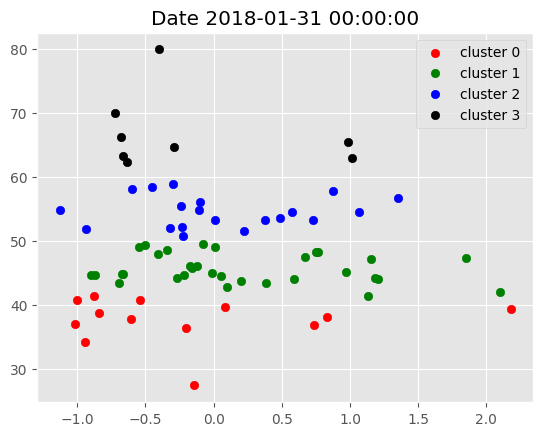

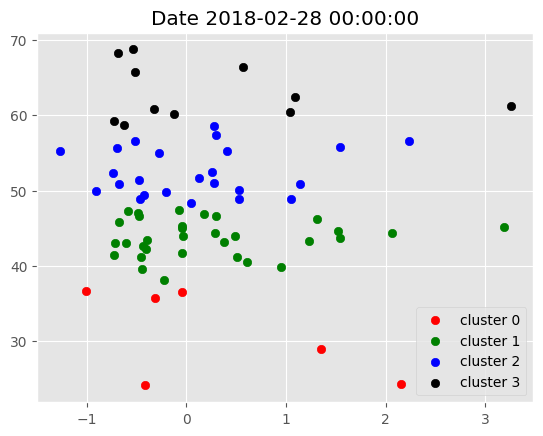

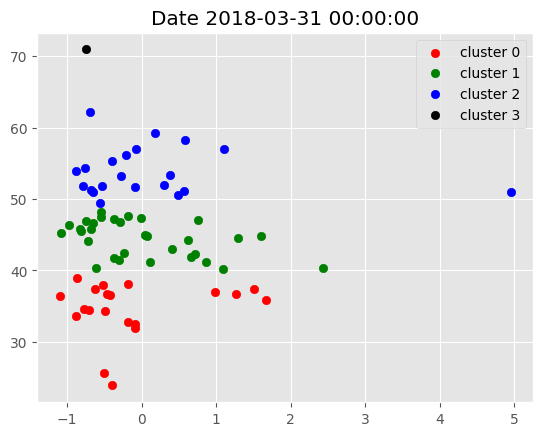

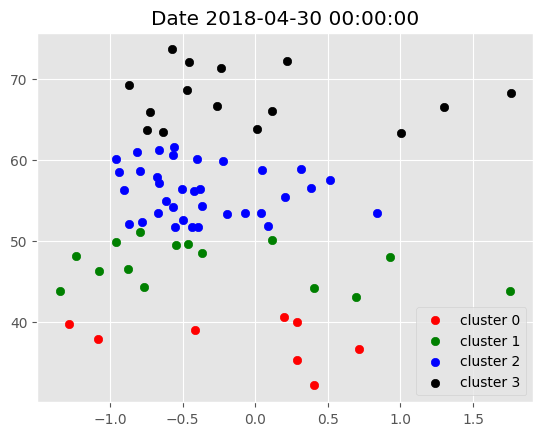

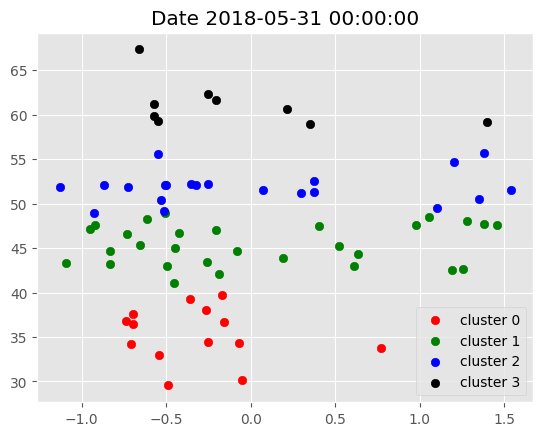

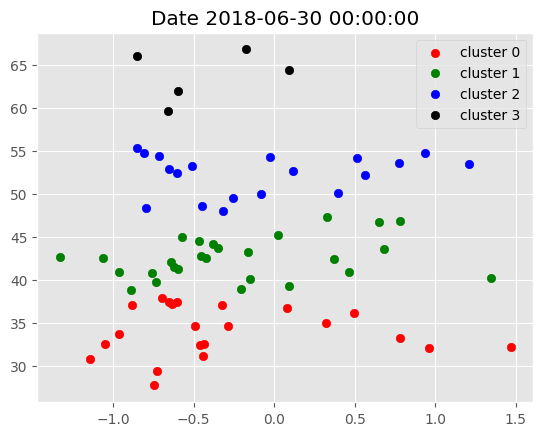

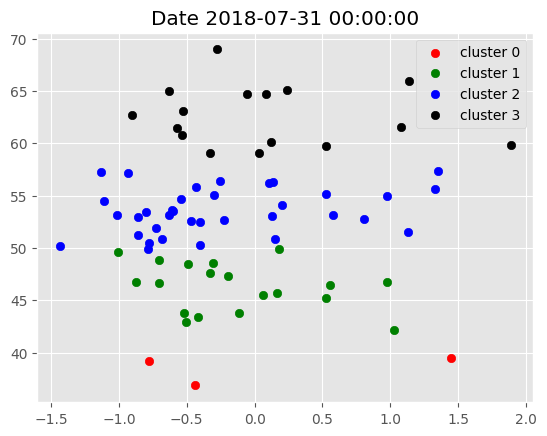

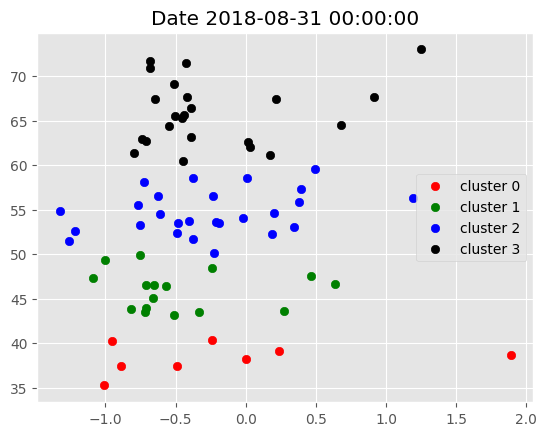

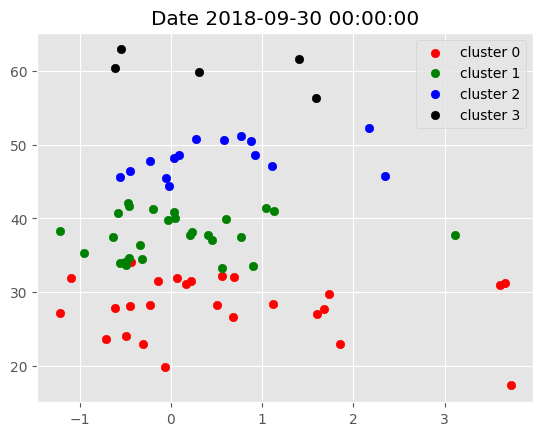

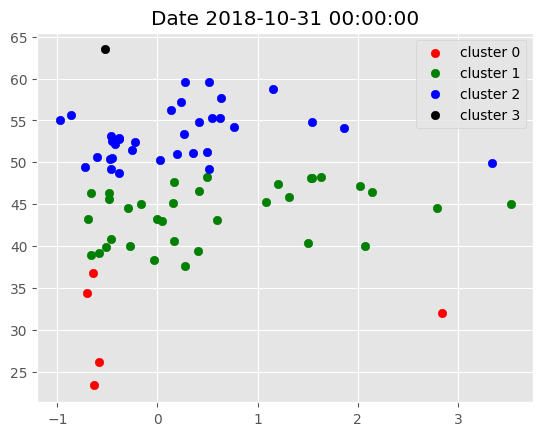

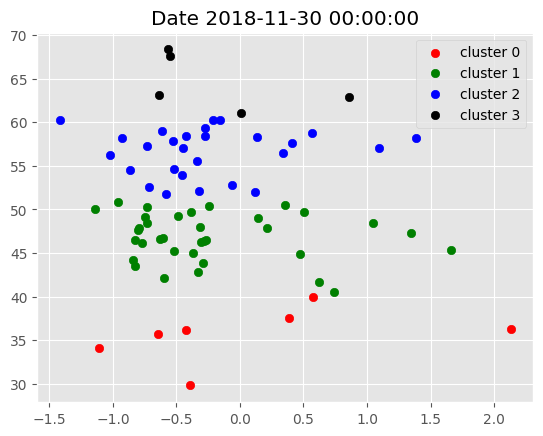

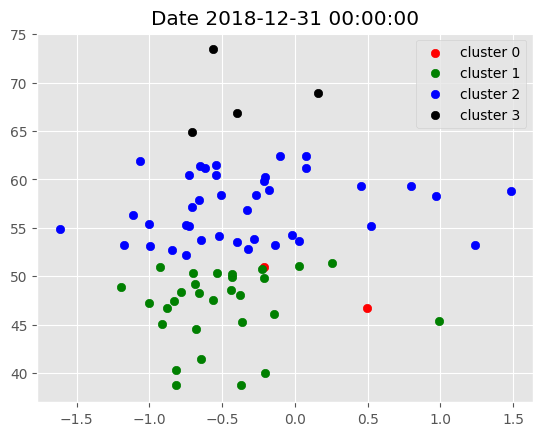

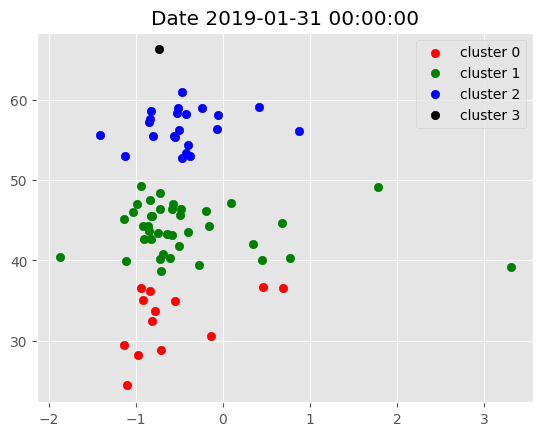

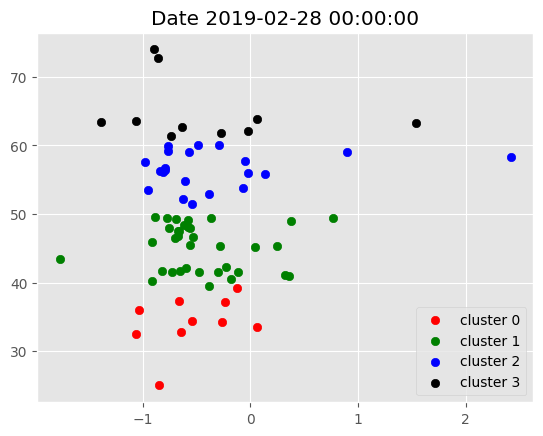

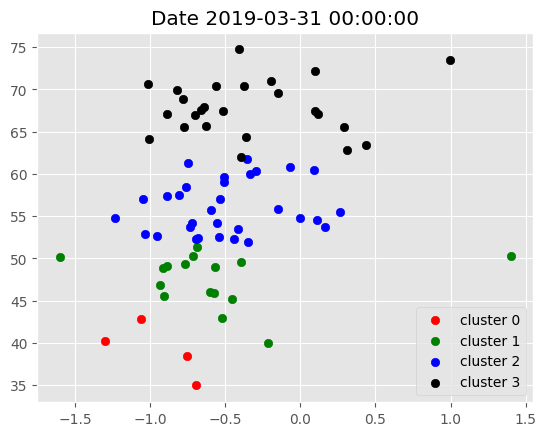

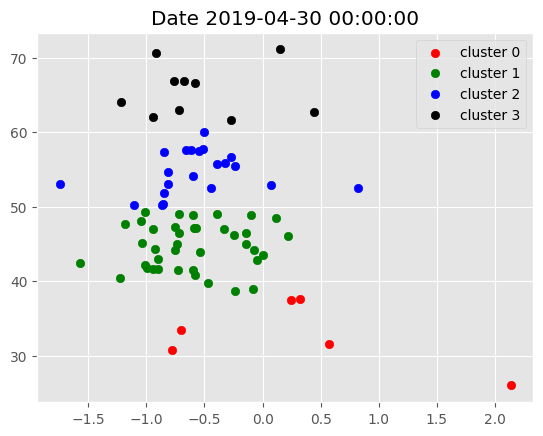

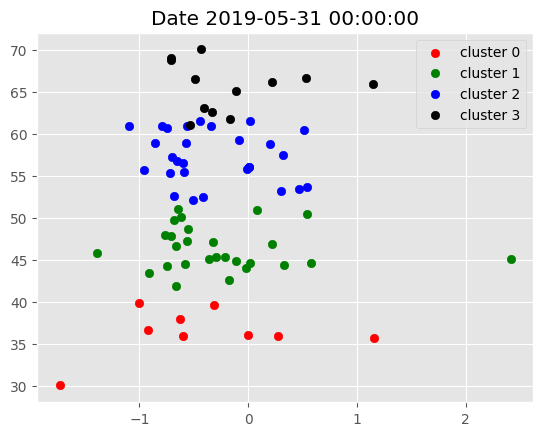

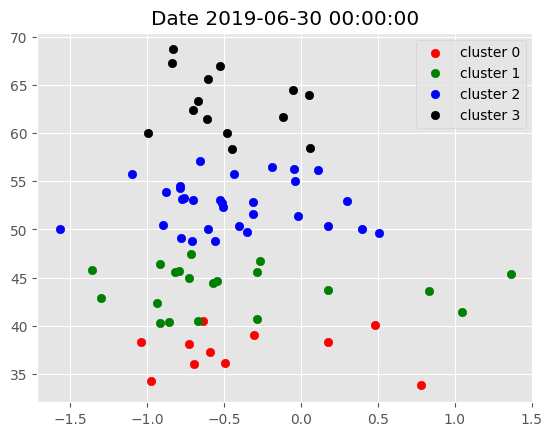

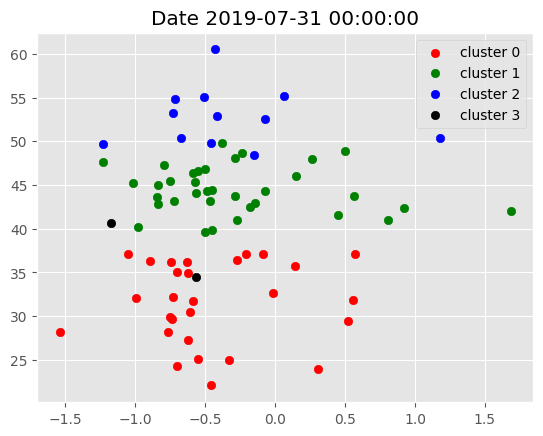

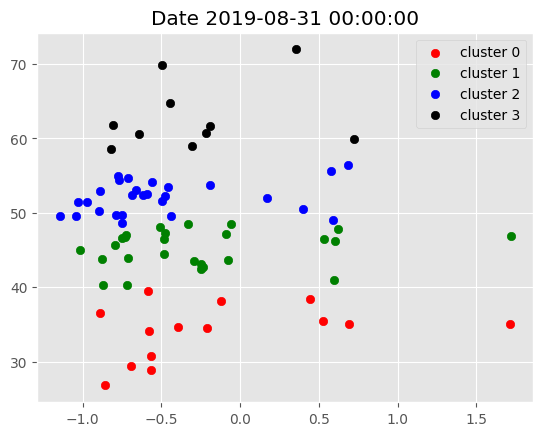

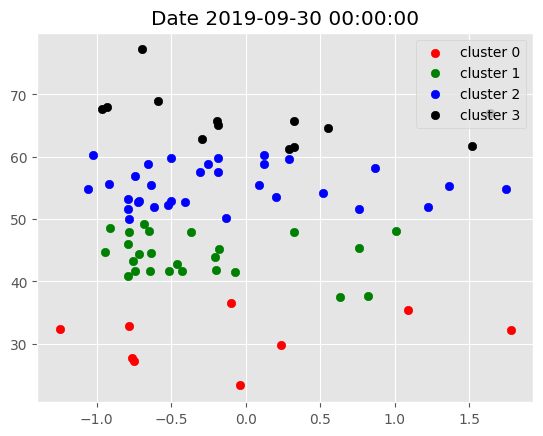

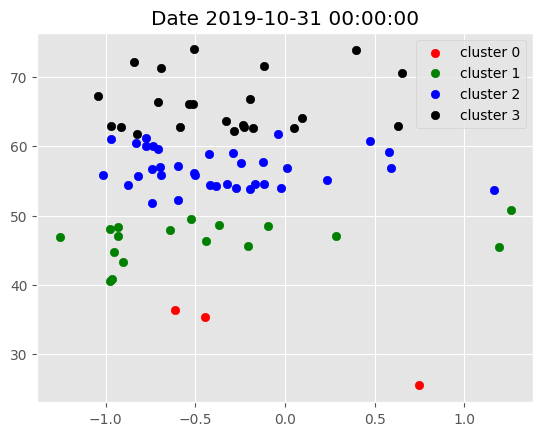

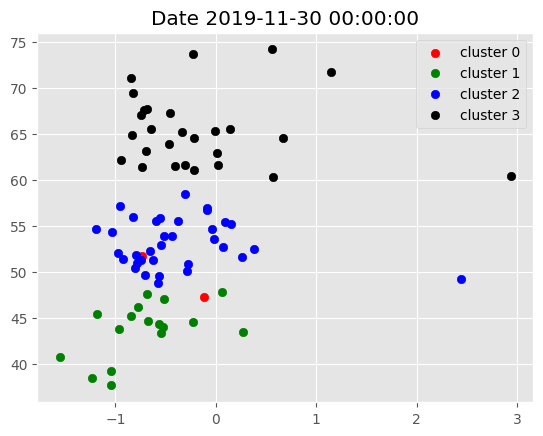

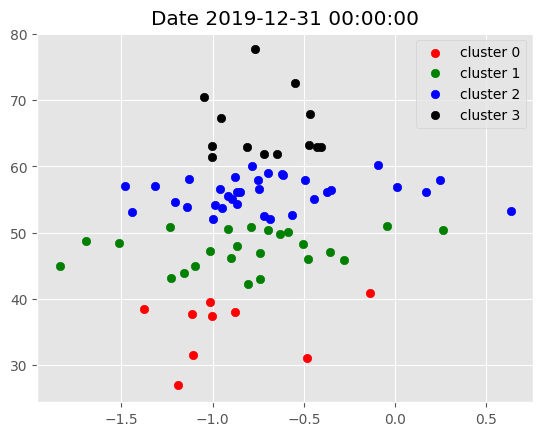

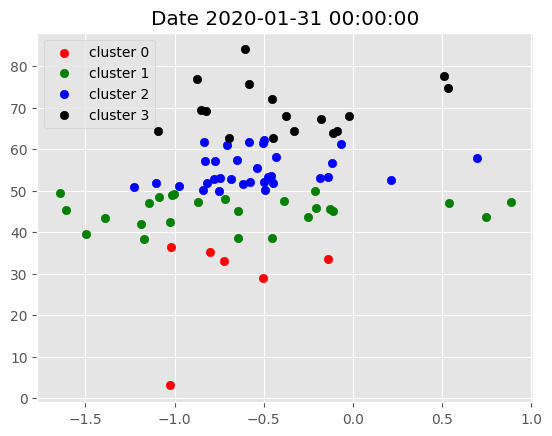

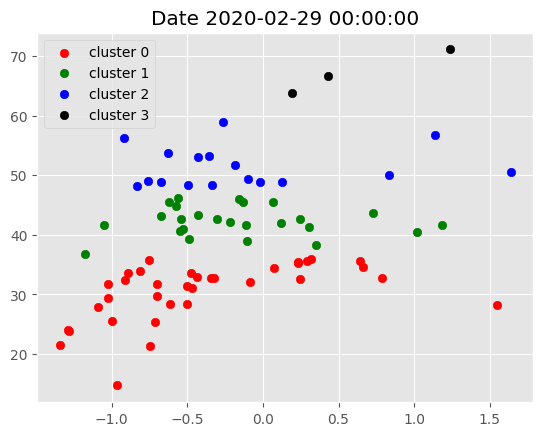

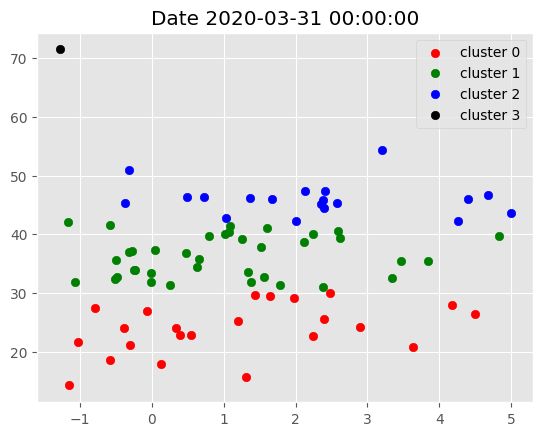

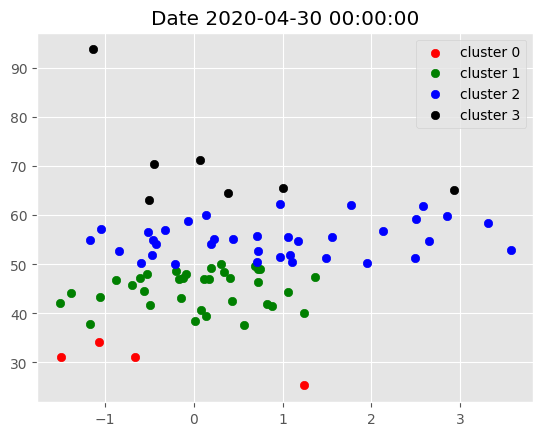

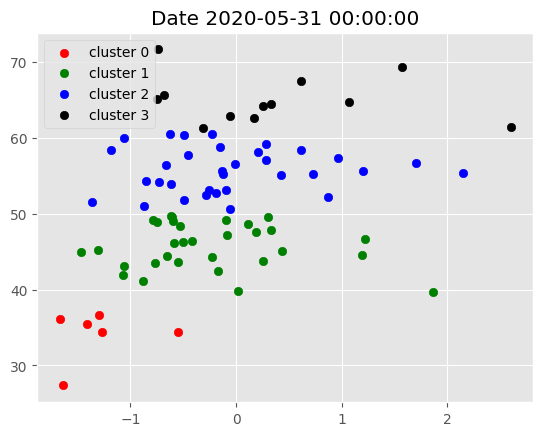

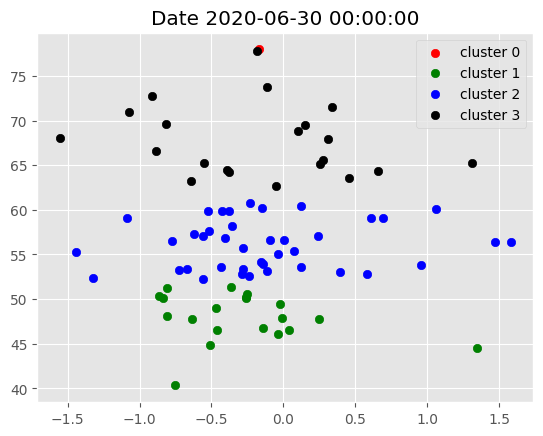

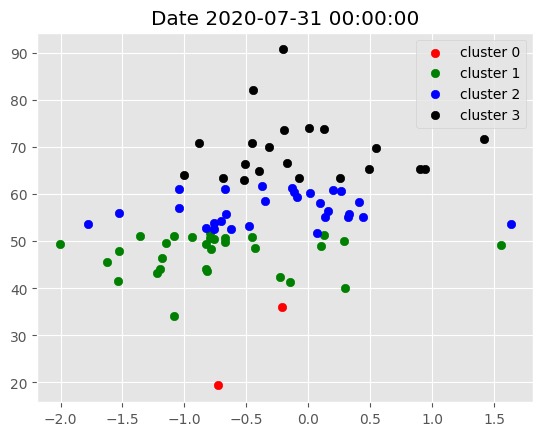

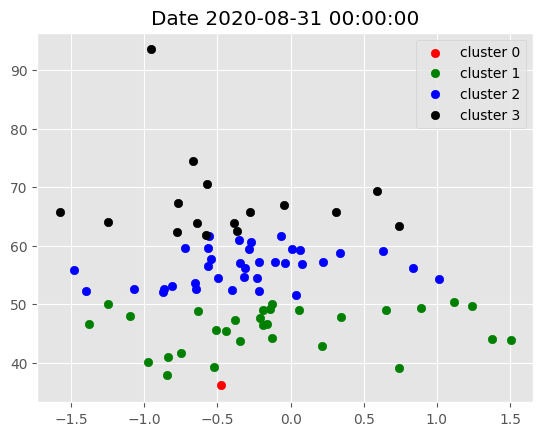

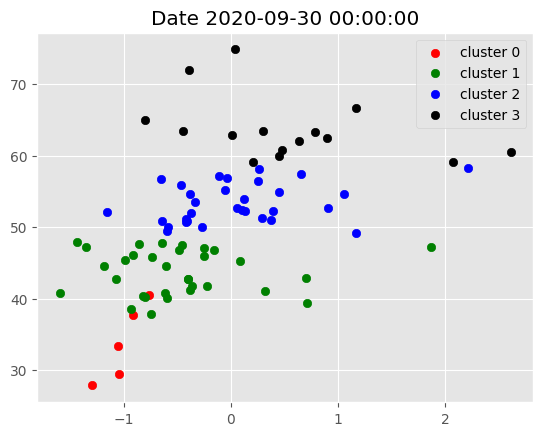

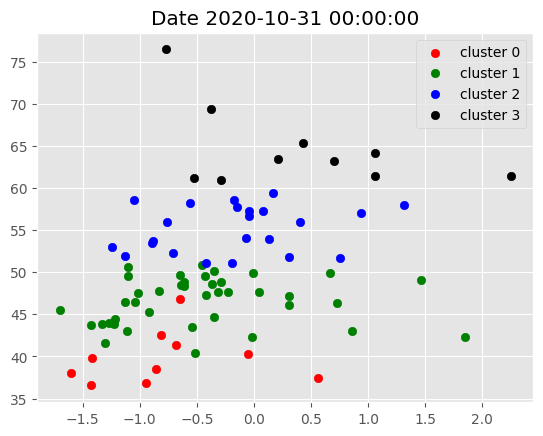

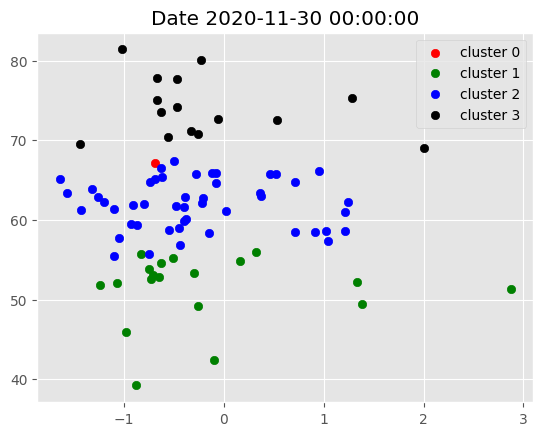

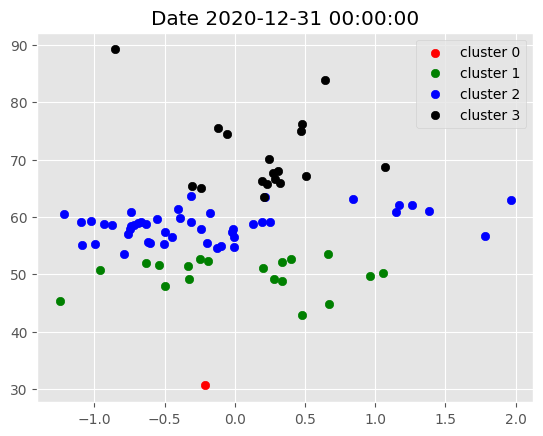

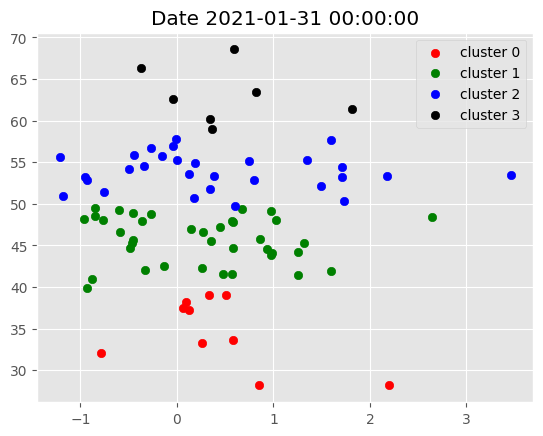

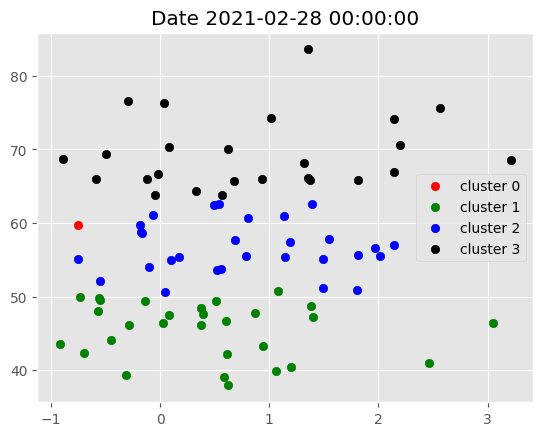

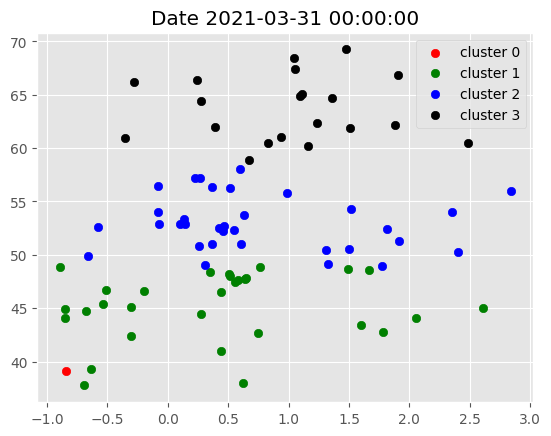

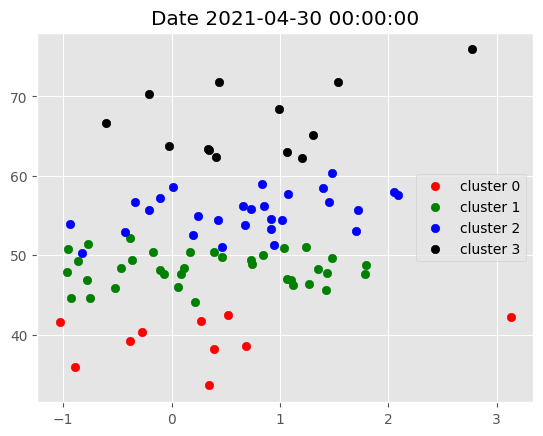

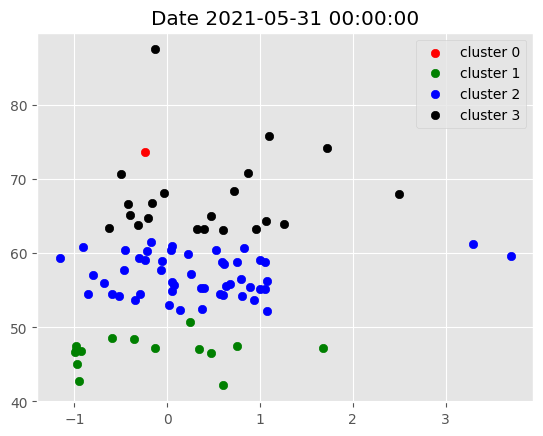

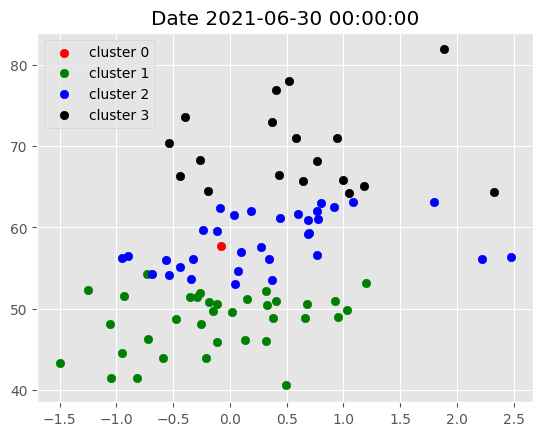

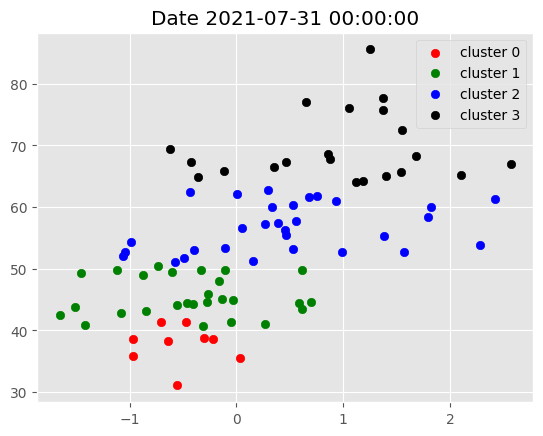

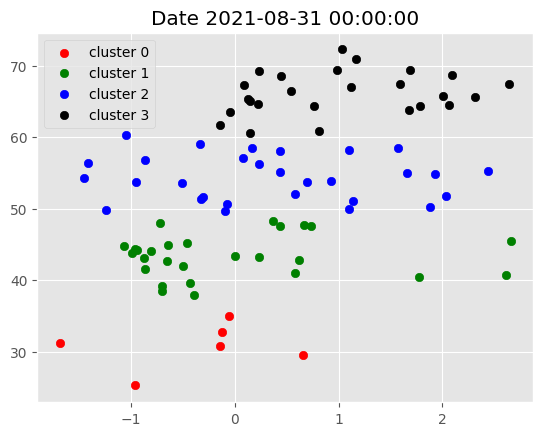

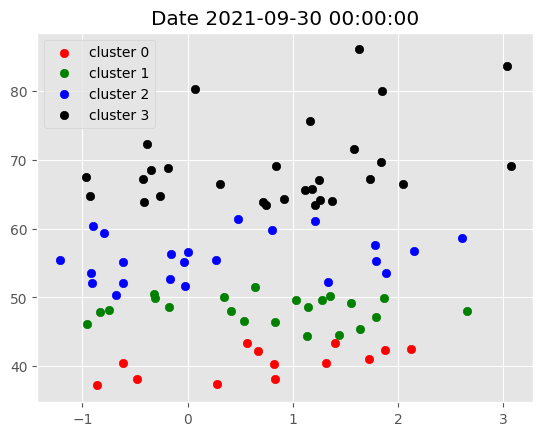

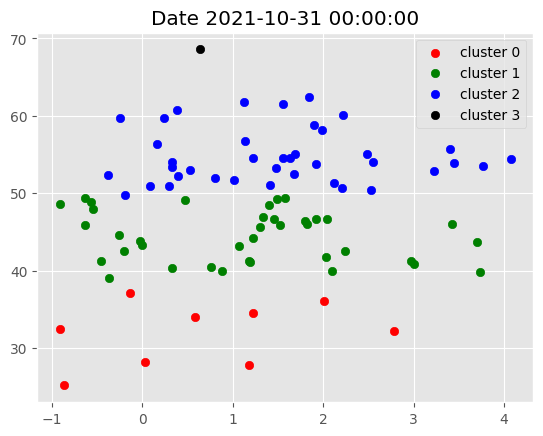

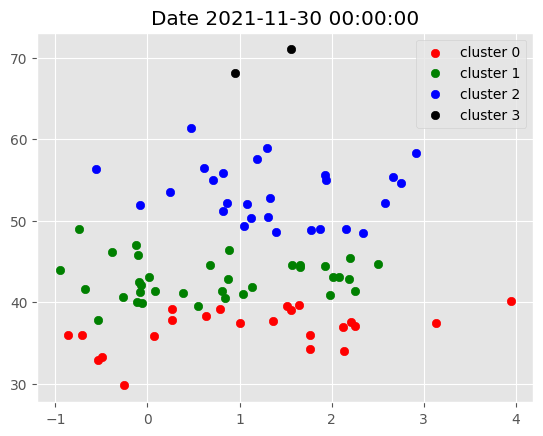

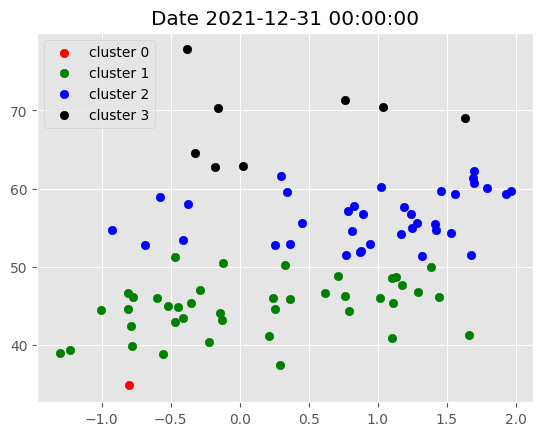

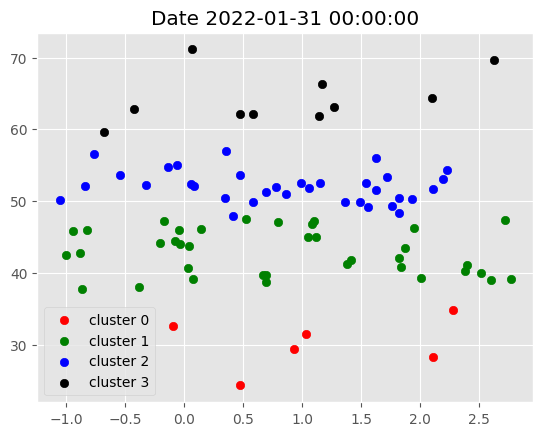

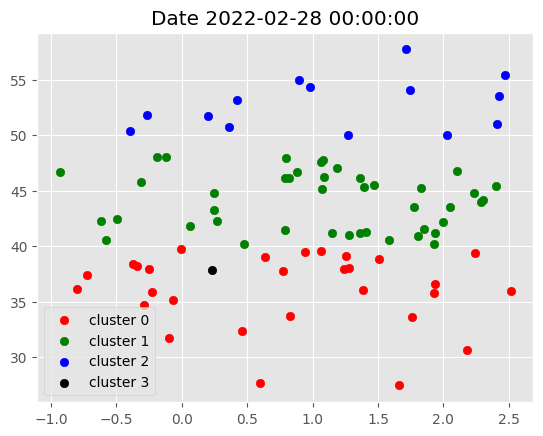

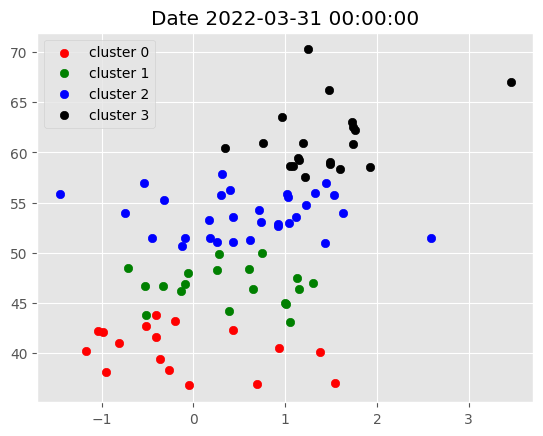

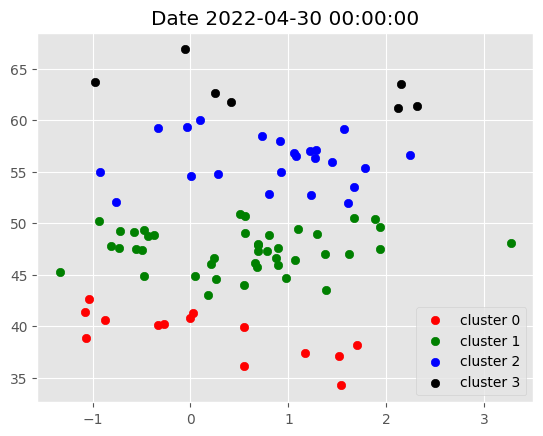

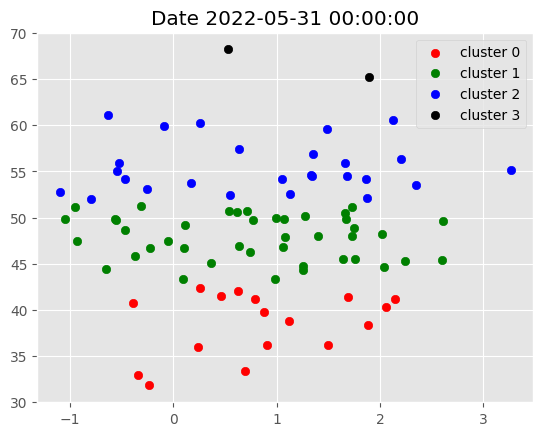

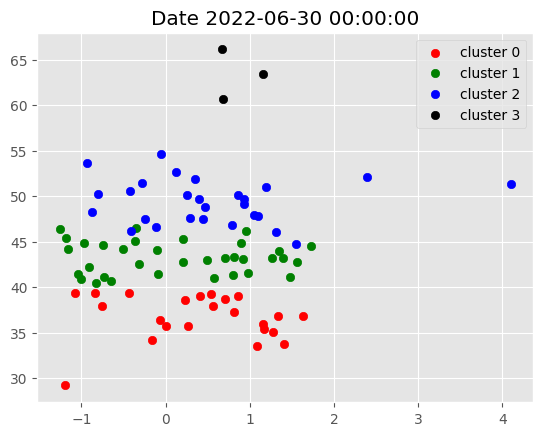

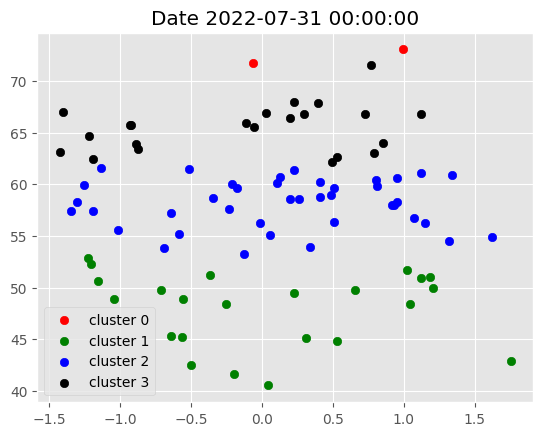

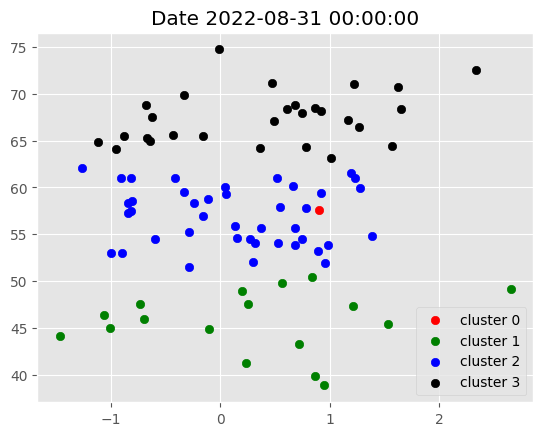

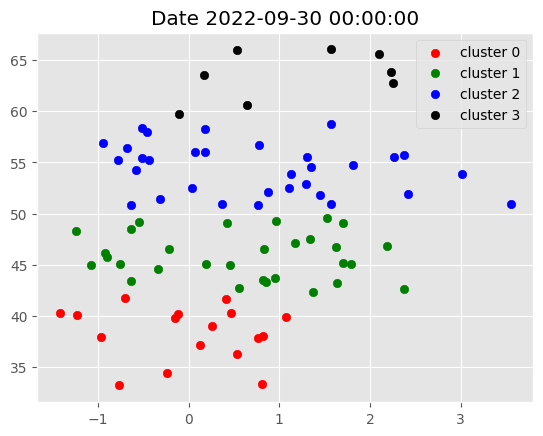

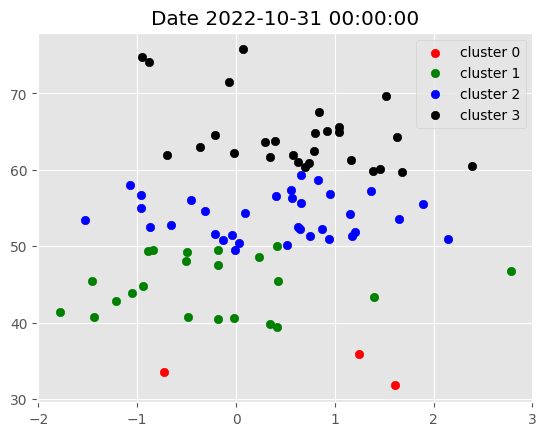

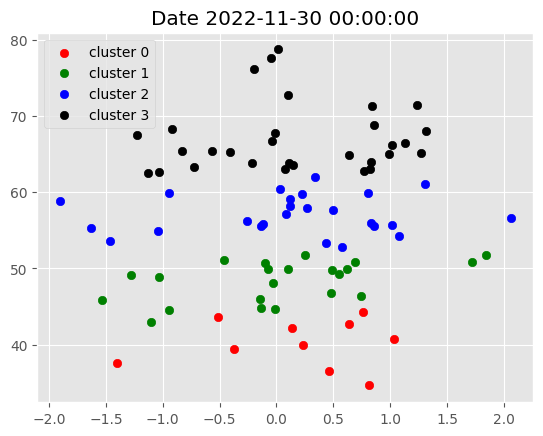

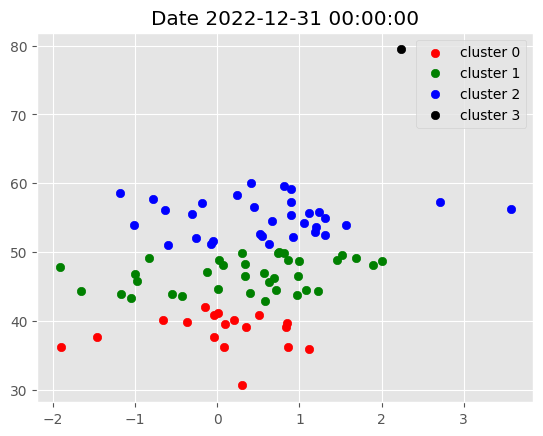

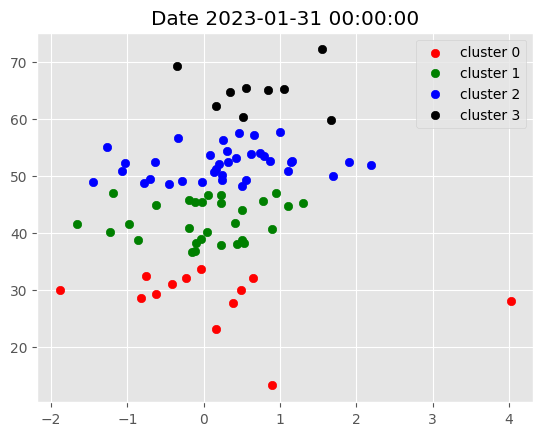

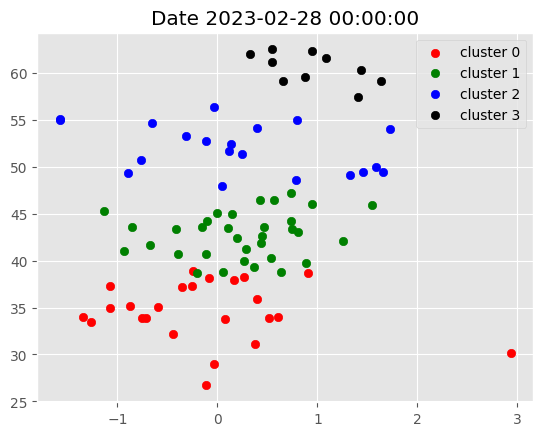

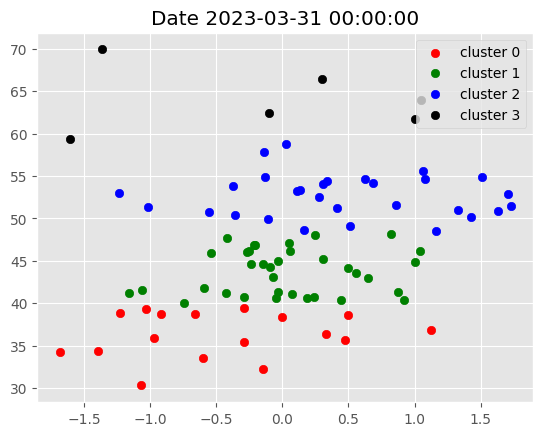

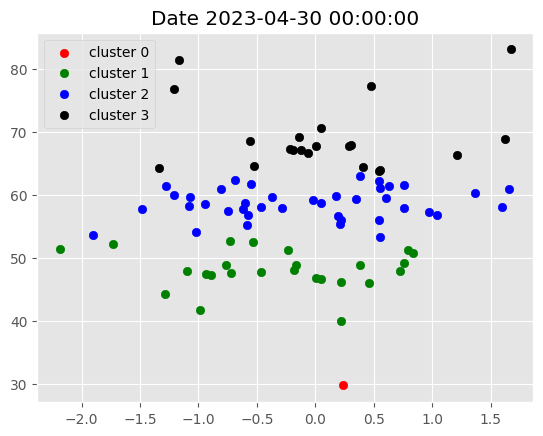

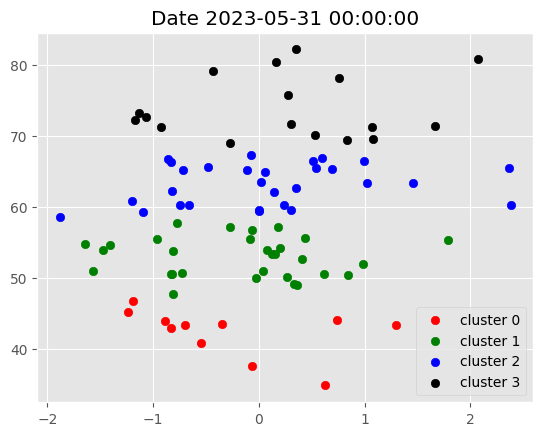

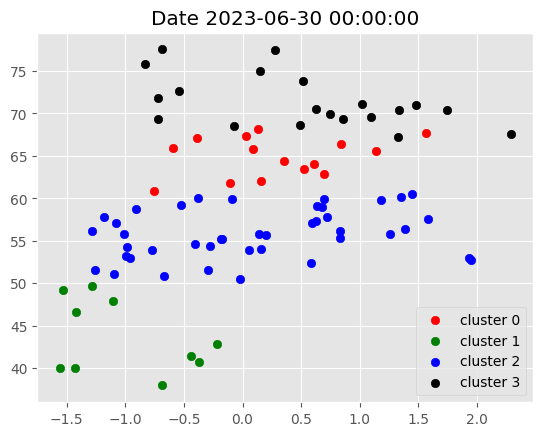

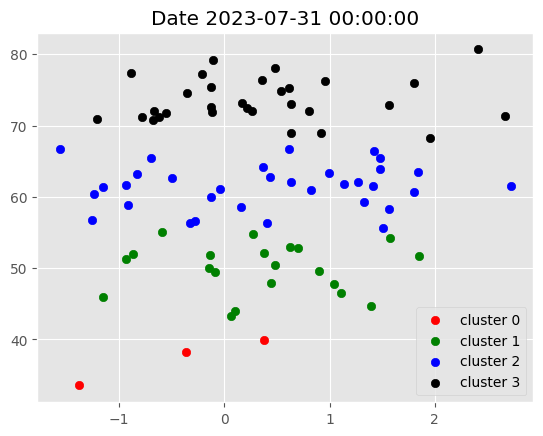

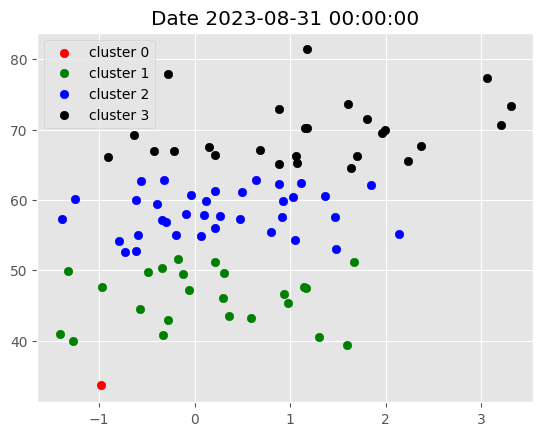

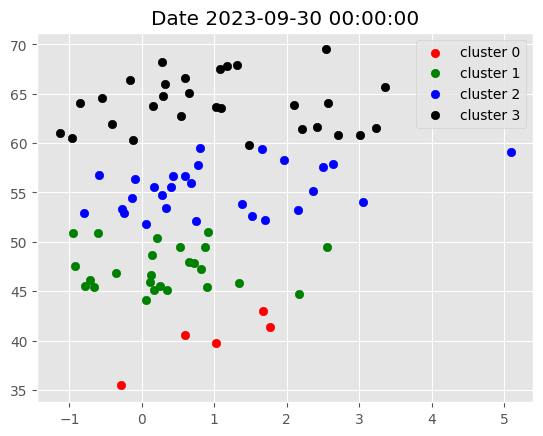

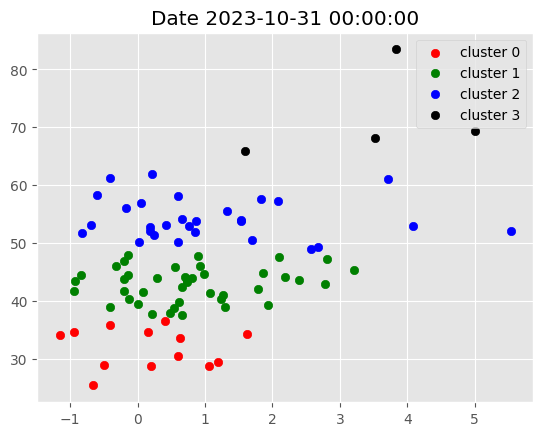

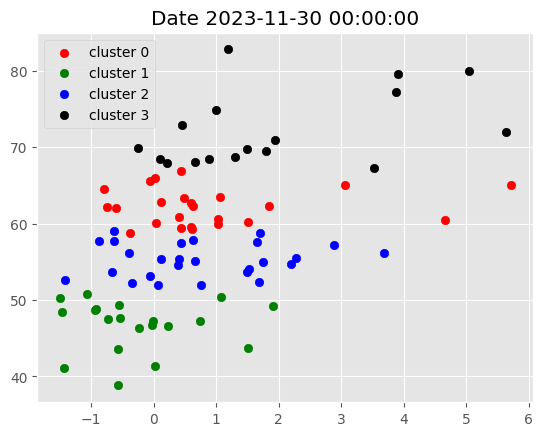

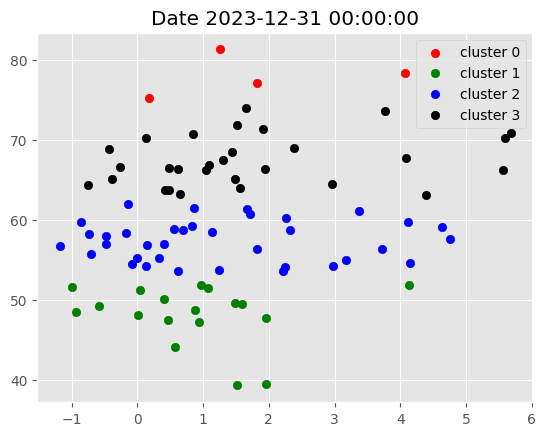

In [ ]:
# Set the 'ggplot' style for matplotlib plots
plt.style.use('ggplot')

# Iterate through unique dates in the multi-level index of the 'data' DataFrame
for date in data.index.get_level_values('date').unique().tolist():
    # Extract the subset of data for the current date
    subset_data = data.xs(date, level=0)

    # Set the plot title with the current date
    plt.title(f'Date {date}')

    # Plot clusters for the current subset of data using the plot_clusters function
    plot_clusters(subset_data)


Apply pre-defined centroids.

In [ ]:
# Define the target RSI values for clustering
target_rsi_values = [30, 45, 55, 70]

# Create an array to store the initial centroids with shape (number of target RSI values, number of features)
initial_centroids = np.zeros((len(target_rsi_values), 18))

# Set the RSI column in each initial centroid to the corresponding target RSI value
initial_centroids[:, 6] = target_rsi_values

# Display the resulting initial centroids array
initial_centroids


array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

In [ ]:
# Filter the 'data' DataFrame to include rows where the 'cluster' column has a value of 3
filtered_df = data[data['cluster'] == 3].copy()

# Reset the index of the filtered DataFrame to default integer index, keeping the date in a separate column
filtered_df = filtered_df.reset_index(level=1)

# Add one day to each date in the index
filtered_df.index = filtered_df.index + pd.DateOffset(1)

# Reset the index to default integer index and set a multi-level index using 'date' and 'ticker' columns
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

# Get unique dates from the index of the filtered DataFrame
dates = filtered_df.index.get_level_values('date').unique().tolist()

# Create a dictionary to store fixed dates and associated tickers
fixed_dates = {}

# Iterate through unique dates in the index
for date in dates:
    # Extract the subset of data for the current date
    subset_data = filtered_df.xs(date, level=0)

    # Store the list of tickers associated with the current date in the dictionary
    fixed_dates[date.strftime('%Y-%m-%d')] = subset_data.index.tolist()

# Display the dictionary with fixed dates and associated tickers
fixed_dates


{'2018-02-01': ['3MINDIA.NS',
  'ABBOTINDIA.NS',
  'BIOCON.NS',
  'COFORGE.NS',
  'DEEPAKNTR.NS',
  'FACT.NS',
  'MPHASIS.NS',
  'PERSISTENT.NS',
  'PHOENIXLTD.NS',
  'TATAELXSI.NS',
  'YESBANK.NS'],
 '2018-03-01': ['3MINDIA.NS',
  'ASHOKLEY.NS',
  'ASTRAL.NS',
  'BHARATFORG.NS',
  'BIOCON.NS',
  'COFORGE.NS',
  'ESCORTS.NS',
  'HINDZINC.NS',
  'IDBI.NS',
  'IPCALAB.NS',
  'PERSISTENT.NS',
  'SJVN.NS',
  'SUNDARMFIN.NS',
  'TATAELXSI.NS',
  'ZFCVINDIA.NS'],
 '2018-04-01': ['JUBLFOOD.NS'],
 '2018-05-01': ['ABBOTINDIA.NS',
  'ASHOKLEY.NS',
  'ATUL.NS',
  'BATAINDIA.NS',
  'BAYERCROP.NS',
  'BHARATFORG.NS',
  'BIOCON.NS',
  'COFORGE.NS',
  'ESCORTS.NS',
  'GODREJIND.NS',
  'GODREJPROP.NS',
  'HONAUT.NS',
  'IPCALAB.NS',
  'JUBLFOOD.NS',
  'M&MFIN.NS',
  'MPHASIS.NS',
  'MRF.NS',
  'MUTHOOTFIN.NS',
  'OFSS.NS',
  'PERSISTENT.NS',
  'SUNDARMFIN.NS',
  'SUPREMEIND.NS',
  'TATACHEM.NS',
  'TATAELXSI.NS',
  'UBL.NS',
  'YESBANK.NS'],
 '2018-06-01': ['ABBOTINDIA.NS',
  'AIAENG.NS',
  'ASTRAL.NS

Define portfolio optimization function
We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [ ]:
# Import necessary modules from PyPortfolioOpt library
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Define a function to optimize portfolio weights based on historical asset prices
def optimize_weights(prices, lower_bound=0):
    # Calculate historical expected returns using mean historical return method
    returns = expected_returns.mean_historical_return(prices=prices, frequency=252)

    # Calculate covariance matrix using sample covariance method
    cov = risk_models.sample_cov(prices=prices, frequency=252)

    # Initialize EfficientFrontier object with expected returns, covariance matrix, and weight bounds
    ef = EfficientFrontier(expected_returns=returns, cov_matrix=cov, weight_bounds=(lower_bound, 0.1), solver='SCS')

    # Maximize Sharpe ratio to get optimal portfolio weights
    weights = ef.max_sharpe()

    # Clean the weights (rounding near-zero weights to zero)
    cleaned_weights = ef.clean_weights()

    return cleaned_weights


Download Fresh Daily Prices Data only for short listed stocks.

In [ ]:
# Extract unique ticker symbols from the index and convert them into a list
stocks = data.index.get_level_values('ticker').unique().tolist()

# Download historical stock data for the list of ticker symbols
# Start date is set to one year (12 months) before the earliest date in the dataset
# End date is set to the latest date in the dataset
new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

# Display or use the downloaded stock data stored in 'new_df' DataFrame
new_df


[*********************100%%**********************]  129 of 129 completed


Price          Adj Close                                                      \
Ticker        3MINDIA.NS ABBOTINDIA.NS ABCAPITAL.NS    ABFRL.NS       ACC.NS   
Date                                                                           
2017-01-31  11457.985352   4186.648926          NaN  147.905365  1271.330322   
2017-02-01  11272.424805   4199.822754          NaN  146.919662  1320.843628   
2017-02-02  11188.389648   4243.955566          NaN  146.771805  1287.834839   
2017-02-03  11117.001953   4251.992676          NaN  143.124695  1280.684204   
2017-02-06  11484.911133   4372.550293          NaN  145.391815  1331.276733   
...                  ...           ...          ...         ...          ...   
2023-12-22  31182.000000  22604.000000   159.699997  219.800003  2084.801025   
2023-12-26  31447.599609  22452.550781   159.899994  221.050003  2107.536133   
2023-12-27  36389.949219  22570.099609   161.750000  220.050003  2162.379639   
2023-12-28  35091.351562  22623.699219   161.649994  219.949997  2164.523438   
2023-12-29  37309.148438  22851.250000   166.399994  223.699997  2204.958008   

Price                                                                          \
Ticker        AIAENG.NS AJANTPHARM.NS     ALKEM.NS APLAPOLLO.NS APOLLOTYRE.NS   
Date                                                                            
2017-01-31  1294.815918   1067.671387  1557.793579   101.247856    160.595535   
2017-02-01  1285.111938   1062.847778  1582.443848   103.816666    166.426483   
2017-02-02  1243.237549   1065.635498  1653.174316   104.484276    164.200912   
2017-02-03  1308.630859   1079.856567  1691.690674   106.448372    163.177170   
2017-02-06  1323.736084   1097.272461  1698.367188   107.981918    162.153412   
...                 ...           ...          ...          ...           ...   
2023-12-22  3574.300049   1945.531372  4882.010742  1588.150024    427.549988   
2023-12-26  3590.699951   1963.867798  4939.728027  1588.050049    430.350006   
2023-12-27  3610.550049   1974.444458  5041.850098  1582.650024    435.649994   
2023-12-28  3679.100098   1971.281372  5092.563965  1543.849976    438.899994   
2023-12-29  3689.500000   2059.651611  5168.311523  1536.800049    454.049988   

Price       ...    Volume                                                 \
Ticker      ... TIMKEN.NS TORNTPOWER.NS  UBL.NS UNIONBANK.NS UNOMINDA.NS   
Date        ...                                                            
2017-01-31  ...     24812        755423  137968      2759245      245277   
2017-02-01  ...     19789        631920  155263      7953417      426008   
2017-02-02  ...     76047        569642   98435      6780058      852505   
2017-02-03  ...    156903        498284  141017     14969300      828041   
2017-02-06  ...     31887        248408  172538      9057071      366556   
...         ...       ...           ...     ...          ...         ...   
2023-12-22  ...     34119        203752  354584     11610568      435437   
2023-12-26  ...     82117        346052  336099      7968782      140761   
2023-12-27  ...     73951        310145  147871     12995015      284035   
2023-12-28  ...     96325        444611  485581     17861879      341022   
2023-12-29  ...     27786        859362  551866     10246266      927928   

Price                                                            
Ticker       UPL.NS VOLTAS.NS YESBANK.NS   ZEEL.NS ZFCVINDIA.NS  
Date                                                             
2017-01-31  1291596   1612843   11578925    852786        37638  
2017-02-01  3405043   1862732   17459400   1553861        16174  
2017-02-02  2364807   1355490    9416970   2282533        20649  
2017-02-03  2007984   1466321    8084475   2404103         3356  
2017-02-06  2589018   1812553    6608055   1204460         5408  
...             ...       ...        ...       ...          ...  
2023-12-22  2464945   1665456  279614591  18959049         2642  
2023-12-26  3443852

Calculate daily returns for each stock which could land up in our portfolio.

Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

Calculated each day portfolio return.

In [ ]:
from pandas.tseries.offsets import MonthEnd

# Calculate log returns of adjusted close prices
returns_dataframe = np.log(new_df['Adj Close']).diff()

# Create an empty DataFrame to store portfolio returns
portfolio_df = pd.DataFrame()

# Loop through each start date in the 'fixed_dates' dictionary
for start_date in fixed_dates.keys():
    try:
        # Calculate the end date for optimization as the end of the same month
        end_date = (pd.to_datetime(start_date) + MonthEnd(0)).strftime('%Y-%m-%d')

        # Get the list of tickers for this start date
        cols = fixed_dates[start_date]

        # Calculate the start and end dates for optimization (12 months prior to start date)
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        # Extract the relevant data for optimization
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, 'Adj Close'][cols]

        # Try to optimize weights using a custom function 'optimize_weights'
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                       lower_bound=round(1 / (len(optimization_df.columns) * 2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            # If optimization fails, print a message and continue with equal weights
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        # If optimization fails or is not attempted, use equal weights
        if not success:
            weights = pd.DataFrame([1 / len(optimization_df.columns) for _ in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=pd.Series(0)).T

        # Filter returns data for the selected start and end dates
        temp_df = returns_dataframe.loc[start_date:end_date]

        # Merge returns and weights dataframes and calculate weighted returns
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0) \
            .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                   left_index=True,
                   right_index=True) \
            .reset_index().set_index(['Date', 'Ticker']).unstack().stack()

        # Set index names and calculate weighted returns
        temp_df.index.names = ['date', 'ticker']
        temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']

        # Calculate strategy return by summing weighted returns
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        # Concatenate the strategy return dataframe to the portfolio dataframe
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        # Handle any exceptions that might occur during the process
        print(e)


Max Sharpe Optimization failed for 2018-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-11-01, Continuing with Equal-Weights
'return'


In [ ]:
# Remove duplicate rows from the 'portfolio_df' DataFrame based on all columns
portfolio_df = portfolio_df.drop_duplicates()

# Display or use the cleaned DataFrame
portfolio_df


,Strategy Return
date,
2018-02-01,-0.007128
2018-02-02,-0.042452
2018-02-05,0.000065
2018-02-06,-0.017221
2018-02-07,0.004990
...,...
2023-12-22,0.005617
2023-12-26,0.002806
2023-12-27,0.002669


Visualize Portfolio returns and compare to nifty midcap 100 returns.

In [ ]:
# Download historical data for the Motilal Oswal Nifty Midcap 150 ETF (ticker symbol '0P0001IAU9.BO')
spy = yf.download(tickers='0P0001IAU9.BO',
                  start='2015-01-01',
                  end=dt.date.today())

# Calculate logarithmic returns for 'SPY' and drop NaN values
spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'NIFTY Micdcap 150 Buy&Hold'}, axis=1)

# Merge 'spy_ret' DataFrame with 'portfolio_df' DataFrame based on index
portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

# Display or use the merged DataFrame 'portfolio_df'
portfolio_df


[*********************100%%**********************]  1 of 1 completed


,Strategy Return,NIFTY Micdcap 150 Buy&Hold
2019-09-09,0.008899,0.000000
2019-09-11,0.005878,0.016690
2019-09-12,-0.001348,-0.002393
2019-09-13,0.006518,0.005152
2019-09-16,0.003279,-0.000893
...,...,...
2023-12-22,0.005617,0.007962
2023-12-26,0.002806,0.005626
2023-12-27,0.002669,0.003894
2023-12-28,0.014653,0.004738


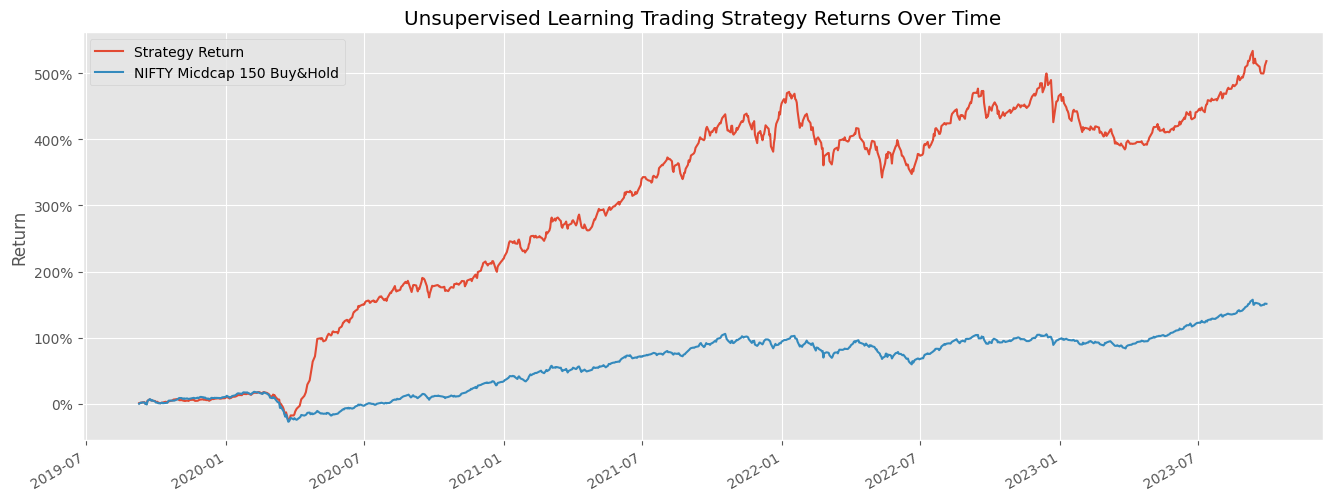

In [ ]:
import matplotlib.ticker as mtick

# Set the style of the plot (ggplot style)
plt.style.use('ggplot')

# Calculate the cumulative return of the portfolio using logarithmic returns
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()) - 1

# Plot the cumulative return until a specific date ('2023-09-29' in this case)
portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16, 6))

# Set plot title and axis labels
plt.title('Unsupervised Learning Trading Strategy Returns Over Time')
plt.ylabel('Return')

# Set y-axis ticks to display percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Display the plot
plt.show()
